# 09. PyTorch Model Deployment

Lets bring FoodVision to life and make it publicly accessible.

**We are going to deploy our FoodVision model to the internet as a usable app!**


## What is machine learning model deployment?

***Machine learning model deployment** is the process of making your machine learning model accessible for others.*

For example, someone taking a photo on their smartphone of food and then having our FoodVision model classify it into pizza, steak, or sushi.

Some other examples can be, *an operating system may lower its resource consumption based on a machine learning model making predictions on how much power someone generally uses at specific times of day.*

Also these models can learn from each other as well. For example, a Tesla car's computer vision system will interact with the car's route planning program and then the route planning program will get inputs and feedback from the driver.


## Why deploy a machine learning model?

One of the most important philosophical question in machine learning is:
***if a machine learning model never leaves a notebook, does it exist?***

---
Deploying a model is as important as training one.

Because although you can get a pretty good idea of how your model is going to function by evaluating it on a well crafted test set or visualizing its results, you never really know how it will perform ultil you release it to the wild.

***Having people who've never used your model interact with it will often reveal edge cases you never thought of during training.***

For example, what happens if someone was to upload a photo that wasn't of food to our FoodVision model?

One solution would be to create another model that firstclassifies images as "food" or "not food" and passing the target image through that model first.

THen if the images is of "food" it goes to our FoodVision model and gets classifies into pizza, steak, or sushi.

And if it's "not food", a message is displayed.

But what is these predictions were wrong?

What happens then?

You can see how these questions could keep going.

Thus this highlights the importance of model deployment: it helps you figure our errors in your model that aren't obvious during training/testing.

---

***But once you've got a good model, deployment is a good next step. Monitoring involves seeing how your model goes on the most important data split: data from the real world.***

## Different types of machine learning model deployment

Whole books could be written on the different types of machine learning model deployment(and many good one are listed [PyTorch Extra Resources](https://www.learnpytorch.io/pytorch_extra_resources/#resources-for-machine-learning-and-deep-learning-engineering))

---
Let's start with a simple question:
> What is the most ideal scenario for our machine leanring model to be used?

ANd then work backward from there.

In case of FoodVision, our ideal scenerio might be:
- someone taking a photo on a mobile device(through an app or web browser)
- The prediction comes back fast.

Easy.

So we have two main criteria:
1. The model should work on a mobile device
2. THe model should make predictions *fast*(because a slow app is a boring app).

And of course, depending on our use case, our requirements may vary.

We may notive the above two points break down into another two questions:
1. **Where's it going to go?** - As in, where is it going to be stored?
2. **How's it going to function?** - As in, does it return predictions immediatedly? or do they come later?

![](09-deployment-questions-to-ask.png)

*When starting to deploy machine learning models, it's helpful to start by asking what's the most ideal use case and then work backwards from there, asking where the model is going to go and then how it's going to function.*

## Where's it going to go?

When you deploy your machine learning model, where does it live?

THe main debate here is usually on-device (also called edge/in the browser) or on the cloud (a computer/server that isn't the actual device someone/something calls the model from).

Both have their pros and cons.

| Deployment location| Pros| Cons|
|:--|:--|:--|
| **On-device(edge/in the browser** | Can be very fast (since no data leaves the device)|Limited compute power (larger models take longer to run)|
| - | Privacy preserving (again no data has to leave the device)| Limited storage space (smaller model size required)|
|-|No internet connection required (sometimes)|Device-specific skills often required|
| **On cloud** | Near unlimited compute power (can scale up when needed)|Costs can get out of hand (if proper scaling limits aren't enforced)|
|-|Can deploy one model and use everywhere (via API)|Predictions can be slower due to data having to leave device and predictions having to come back (network latency)|
|-|Links into existing cloud ecosystem|Data has to leave device (this may cause privacy concerns)|

There are more details to these but I've left resources in the extra-curriculum to learn more.

Let's give an example.

If we're deploying FoodVision as an app, we want it to perform well and fast.

<div class='alert alert-success'>

So which model would we prefer?
1. A model on-device that performs at 95% accuracy with an inference time (latency) of one second per prediction.
2. A model on the cloud that performs at 98% accuracy with an inference time of 10 seconds per prediction (bigger, better model but takes longer to compute).

</div>

We've made these numbers up but they showcase a potential difference between on-device and on the cloud.

***Option 1** could potentially be a smaller less performant model that runs fast because its able to fit on a mobile device.*

***Option 2** could potentially a larger more performant model that requires more compute and storage but it takes a bit longer to run because we have to send data off the device and get it back (so even though the actual predictoin might be fast, the network time and data transfer has to be factored in)

**For FoodVision, we'd likely prefer 1, because the small hit in performance is outweighted by the faster inference speed.
![](09-model-deployment-on-device-vs-cloud.png)

*In the case of a Tesla car's computer vision system, which would be better? A smaller model that performs well on device (model is on the car) or a larger model that performs better that's on the cloud? In this case, you'd much prefer the model being on the car. The extra network time it would take for data to go from the car to the cloud and then back to the car just wouldn't be worth it (or potentially even impossible with poor signal areas).*

***Note**: For a full example of seeing what it's like to deploy a PyTorch model to an edge device, see the PyTorch tutorial on achieving real-time inference (30fps+) with a computer vision model on a Raspberry Pi.*

## How's it going to function?

Back to the ideal use case, when you deploy your machine learning, **How should it work?**

1. *As in, would you like predictions returned immediately??*

2. *or is it okay for them to happen later?*

These two scenarios are generally referred to as:
- Online (real-time) - *Predictions/inference happen **immediately***. For eample, someone uploads an image, the image gets transformed and predictions are returned or someone makes a purchase and the transaction is verified to be non-fraudulent by a model so the purchase can go through.
- Offline (batch) - *Predictions/inference happen **periodically***. For example, a photos application sorts your images into different categories (such as beach, mealtime, family, friends) whilst your mobile device is plugged into charge.

***Note:** `Batch` refers to inference being performed on multiple samples at a time. However, to add a little confusion, batch processing can happen immediately/online (multiple images being classified at once) and/or offline (multiple images being predicted/trained on at once).*

The main difference between each being: prediction being made immediately or periodically.

Periodically can have a varying timescale too, from every few seconds to every few hours or days.

And you can mix and match the two.

In the case of FoodVision, we'd want our inference pipeline to happen online (real-time), so when someone uploads an image of pizza, steak, or sushi, the prediction results are returned immediately (any slower than real-time would make a boring experience).

But for our training pipeline, it's okay for it to happen in a batch (offline) fashion, which is what we've beein doing throughout the previous chapters.

## Ways to deploy a machine learning model

We've discussed a couple of options for deploying machine learning models (on-device and cloud)

And each of these will have their specific requirements.

| Tool/Resource | Deployment Type|
|:-|:-|
| [Google's ML Kit](https://developers.google.com/ml-kit)| On-device (Android and iOS)|
| [Apple's Core ML](https://developer.apple.com/documentation/coreml) and [`coremltools` Python package](https://apple.github.io/coremltools/docs-guides/) | On-device (all Apple devices)|
| [Amazon Web Service's (AWS) Sagemaker](https://aws.amazon.com/sagemaker/)| Cloud|
| [Google Cloud's Vertex AI](https://cloud.google.com/vertex-ai) | Cloud |
| [Microsoft's Azure Machine Learning](https://azure.microsoft.com/en-au/services/machine-learning/) | Cloud|
| [HuggingFace Spaces](https://huggingface.co/spaces) | Cloud |
| API with [FastAPI](https://fastapi.tiangolo.com/) | Cloud/self-hosted server |
|API with [TorchServe](https://pytorch.org/serve/) | Cloud/self-hosted server |
| [ONNX (open Neural Network Exchange)](https://pytorch.org/serve/) | Many/general|
| Many more..|-|

***Note**: An application programming interface (API) is a way for two (or more) computer programs to interact with each other. For example, if your model was deployed as API, you would be able to write a program that could send data to it and then receive predictions back.*

Which option you choose will be highly dependent on what you're building/who you're working with.

But with so many options, it can be very intimidating.

So best to start small and keep it simple.

And one of the best ways to do so is by turning your machine learning model into a demp app with [***Gradio***](https://gradio.app/) and then deploying it on Hugging Face spaces.

We'll be doing just that with FoodVision later on.
![](09-tools-and-places-to-deploy-ml-models.png)

*A handful of places and tools to host and deploy machine learning models. There are plenty we've missed, feel free to find them later.*

## What we're going to cover

Let's become a machine learning engineer and actually deploy a machine learning model.

Our goal is to deploy our FoodVision Model via a demo Gradio app with the following metrics:
1. **Performance**: 95% accuracy.
2. **Speed**: real-time inference of 30FPS+(each prediction has a latency of lower than ~0.03s)

We'll start by running an experiment to compare our best two models so far: EffNetB2 and ViT feature extractors.

Then we'll deploy the one which performs closest to our goal metrics.

***Finally, we'll finish with a (BIG) surprise bonus.***

| Topic |
|:-|
|**0. Setting up** |
|**1. Get data** |
|**2. FoodVision Mini model deployment experiment outline**|
|**3. Creating an EffNetB2 feature extractor**|
|**4. Creating a ViT feature Extractor**|
|**5. Making predictions with our trained models and timing them**|
|**6. Comparing model results, prediction times and size**|
|**7. Bringing FoodVision to life by creating a Gradio demo**|
|**8. Turning our FoodVision Gradio demo into a deployable app**|
|**9. Deploying our gradio demo to HuggingFace Spaces**|
|**10. Creating a BiG surprise**|
|**11. Deploying our BiG suprise****|

## 0. Setting up

As we've dome previously, let's make sure we've got all of the modules we'll need for this section.

We'll import the Python scripts (such as `data_setup.py` and `engine.py`) we created in 05. PyTorch Going Modular.

To do so, we'll download `going_modular` directory from the `pytorch-deep-learning` repository (if we dont already have it).

We'll also get the `torchinfo` package if it's not available.

`torchinfo` will help later on to give us visual representation of our model.

ANd since later on we'll be using `torchvision`, we'll make sure we've got the latest versions.

In [120]:
import torch
import torchvision

print(f"torch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


Now we'll continue with the regular imports, setting up device agnostic code, and this time we'll also get the `helper_functions.py` script from GitHub.

The `helper_functions.py` scrip contains several functions we created in previous sections:
- `set_seeds()` - sets the random seeds
- `download_data()` - to download a data source given a link
- `plot_loss_curves()` - to inspect our model's training results.

In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [3]:
# device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Getting data

We left off in `08. PyTorch Paper Replicating` comparing our own `Vision Transformer (ViT)` feature extractor model to the `EfficientNetB2 (EffNetB2)` feature extractor model we created in `07. PyTorch Experiment Tracking.`

And we found that there was a slight difference in the comparison.

The EffNetB2 model was trained on 20% of the pizza, steak, and sushi data from Food101 where as the ViT model was trained on 10%.

Since our goal is to deploy the best model for our FoodVision problem, let's  start by downloading the [20% pizza, steak, and sushi dataset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip) and train an EffNetB2 feature extractor and ViT feature extractor on it and then compare the two models.

This way we'll be comparing apples to apples (one model trained on a dataset to another model tarined on the same dataset).

***Note:** The dataset we're downloading is a sample of the entire [`Food101 dataset`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html#food101) (101 food classes with 1,000 images each). More specifically, 20% refers to 20% of images from the pizza, steak and sushi classes selected at random. You can see how this dataset was created in `extras/04_custom_data_creation.ipynb` and more details in `04. PyTorch Custom Datasets section 1`.*

We can download the data using the `download_data()` function we created in `07. PyTorch Experiment Tracking section 1` from `helper_functions.py`.

In [4]:
# Download pizza, steak, sushi images from GitHub
data_20_percent_path = download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip",
                                     destination="pizza_steak_sushi_20_percent")

data_20_percent_path

[INFO] data/pizza_steak_sushi_20_percent directory exists, skipping download.


PosixPath('data/pizza_steak_sushi_20_percent')

Now,

Let's create training and test paths.

In [5]:
# Setup directory paths to train and test images
train_dir = data_20_percent_path / "train"
test_dir = data_20_percent_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

## 2. FoodVision model deployment experiment outline

The ideal deployed model FoodVision performs well and fast.

We'd like our model to perform as close to real-time as possible.

Real-time in this case being ~30FPS (frames per second) because that's [about how fast the human eye can see ](https://www.healthline.com/health/human-eye-fps) (there is debate on this but let's just use ~30FPS as our benchmark).

And for classifying three different classes (pizza, steak, and sushi), we'd like a model that performns at 95%+ accuracy.

Of course, higher accuracy would be nice but this might sacrifice speed.

So our goals are:
1. **Performance** - A model that performs at 95%+ accuracy.
2. **Speed** - A model that can classify an image at ~30FPS(0.03 seconds inference time per image, also known as *latency*)

![](09-model-deployments-speed-vs-inference.png)

*FoodVIsion deployment goals. We'd like a fast predicting well-performing model (because a slow app is boring).

We'll put an emphasis on speed, meaning, we'd prefer a model performing at 90%+ accuracy at ~30FPS than a model performing 95% accuracy at 10FPS.

To try and achieve these results, let's bring in our best performing models from the previous sections:
1. **EffNetB2 feature extractor**(EffNetB2 for short) - originally created in `07. PyTorch Experiment Tracking section 7.5` using `torchvision.models.efficientnet_b2()` with adjusted classifier layers.
2. **ViT-B/16 feature extractor**(ViT for short) - originally created in `08. PyTorch Paper Replicating section 10` using `torchvision.models.vit_b_16()` with adjusted head layers.
    - **Note**: ViT-B/16 stands for <- Vision Transformer Base, path size 16.
  
![](09-model-deployment-two-experiments.png)

***Note:** a `feature extractor model` often starts with a model that has been pretrained on a dataset similar to your own problem. The pretrained model's base layers are often left frozen (the pretrianed pattherns/weights stay the same) whilst some of the top (or classifier/classification head) layers get customized to your own problem by training on your own data. We covered the concept of a feature extractor model in `06. PyTorch Transfer Learning section 3.4.`*

## 3. Creating an EffNetB2 feature extractor

We first created an EffNetB2 feature extractor model in ` 07. PyTorch Experiment Tracking section 7.5.`

And by the end of that section we saw it performed very well.

So let's now recreate it here so we can compare its results to a ViT feature extractor trained on the same data.

To do so we can:
1. Setup the pretrained weights as `weights=torchvision.models.EfficientNet_B2_Weights.DEFAULT` where `DEFAULT` means `best currently available` (or could use weights=`DEFAULT`)
2. Get the pretrained model image transformed from the weights with the `transforms()` method (we need these so we can convert our images into the same format as the pretrained EffNetB2 was trained on).
3. Create a pretrained model instance by passing the weights to an instance of `torchvision.models.efficientnet_b2`
4. Freeze the base layers in the model.
5. Update the classifier head to suit our own data.

In [6]:
# 1. Setup pretrained weights
effnetb2_weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT

# 2. Get EffNetB2 transforms
effnetb2_transforms = effnetb2_weights.transforms()

# 3. Setup pretrained model
effnetb2 = torchvision.models.efficientnet_b2(weights=effnetb2_weights)

# 4. Freeze the base layers in the model
for param in effnetb2.features.parameters():
    param.requires_grad = False

# 5. Update the classifer head to suit our own data
print(f'Classifier head before: {effnetb2.classifier}') 

# changing the out_features = 3 (pizza, steak, and sushi)
effnetb2.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.3, inplace=True),
    torch.nn.Linear(in_features=1408, out_features=3, bias=True)
)

print(f'Classifier head after: {effnetb2.classifier}') 

Classifier head before: Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=1000, bias=True)
)
Classifier head after: Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1408, out_features=3, bias=True)
)


Great!!

***Note**: This process of changing the output layers/classifier head will be dependent on the problem you're working on. For example, if you wanted a different number of outputs or a different kind of output, you would have to change the output layers accordingly.*


### 3.1 Creating a function to make an EffNetB2 feature extractor

Looks like our EffNetB2 feature extractor is ready to go, however, since there's quite a few steps involved here, how about we turn the code about into a function we can re-use later?

we'll call it `create_effnetb2_model()` and it'll take a customizable number of classes and a random seed parameter for reproducibility.

Ideally, it will return EffNetB2 feature extractor along with its associated transforms.

In [28]:
def create_effnetb2_model(num_classes:int=3, 
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # 1, 2, 3. Create EffNetB2 pretrained weights, transforms and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # 4. Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # 5. Change classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes),
    )
    
    return model, transforms

Let's test it out.

In [29]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3,
                                                      seed=42)

No errors, nice, now to really try it out, let's get a summary with torchinfo.summary().

In [9]:
from torchinfo import summary

summary(model=effnetb2,
        input_size=(1,3,224,224),
        col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names']
       )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 3]               --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1

### 3.2 Creating DataLoaders for EffNetB2

Our EffNetB2 feature extractor is ready, time to create some `Dataloader`s

We can do this by using the `data_setup.create_dataloaders()` function we created in `05. PyTorch Going Modular section 2`

We'll use a `batch_size` of 32 and transform our images using `effnetb2_transforms` so they're in the same format that our effnetb2 model was trained on.

In [10]:
# Setup DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

### 3.3 Training EffNetB2 feature extractor

Model ready, `DataLoader`s ready, let's train!

Just like in `07 PyTorch Experiment Tracking section 7.6`, ten epochs should be enough to get good results.

We can do so by creating:
1. an optimizer (we'll use `torch.optim.Adam()` with a learning rate of `1e-3`)
2. a loss function (we'll use `torch.nn.CrossEntropyLoss()` for multi-class classification)

and passing these as well as our `DataLoader`'s to the `engine.train()` function we created in 05. `PyTorch Going Modular section section 4`

In [11]:
from going_modular.going_modular import engine

# setup optimizer
optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=0.001)

# setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# set seends for reproducibility and train the model
set_seeds()
effnetb2net_results = engine.train(model=effnetb2,
                                   train_dataloader=train_dataloader_effnetb2,
                                   test_dataloader=test_dataloader_effnetb2,
                                   optimizer=optimizer,
                                   loss_fn=loss_fn,
                                   epochs=10,
                                   device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9804 | train_acc: 0.5646 | test_loss: 0.7385 | test_acc: 0.9284
Epoch: 2 | train_loss: 0.6843 | train_acc: 0.8729 | test_loss: 0.5931 | test_acc: 0.9347
Epoch: 3 | train_loss: 0.5644 | train_acc: 0.8979 | test_loss: 0.4820 | test_acc: 0.9347
Epoch: 4 | train_loss: 0.4720 | train_acc: 0.8667 | test_loss: 0.4185 | test_acc: 0.9443
Epoch: 5 | train_loss: 0.4309 | train_acc: 0.8729 | test_loss: 0.3725 | test_acc: 0.9568
Epoch: 6 | train_loss: 0.3748 | train_acc: 0.8938 | test_loss: 0.3456 | test_acc: 0.9443
Epoch: 7 | train_loss: 0.3367 | train_acc: 0.9083 | test_loss: 0.3123 | test_acc: 0.9506
Epoch: 8 | train_loss: 0.3237 | train_acc: 0.9250 | test_loss: 0.3014 | test_acc: 0.9688
Epoch: 9 | train_loss: 0.3657 | train_acc: 0.8625 | test_loss: 0.2753 | test_acc: 0.9381
Epoch: 10 | train_loss: 0.2551 | train_acc: 0.9437 | test_loss: 0.2639 | test_acc: 0.9597


### 3.4 Inspecting EffNetB2 loss curves

As we saw in 07. PyTorch Experiment Tracking, the EffNetB2 feature extractor model works quite well on our data.

Let's turn its results into loss curves to inspect them further.

***Note**: Loss curves are one of the best ways to visualize how your model's performing. For more on loss curves, check out `04. PyTorch Custom Datasets section 8: What should an ideal loss curve look like`?*

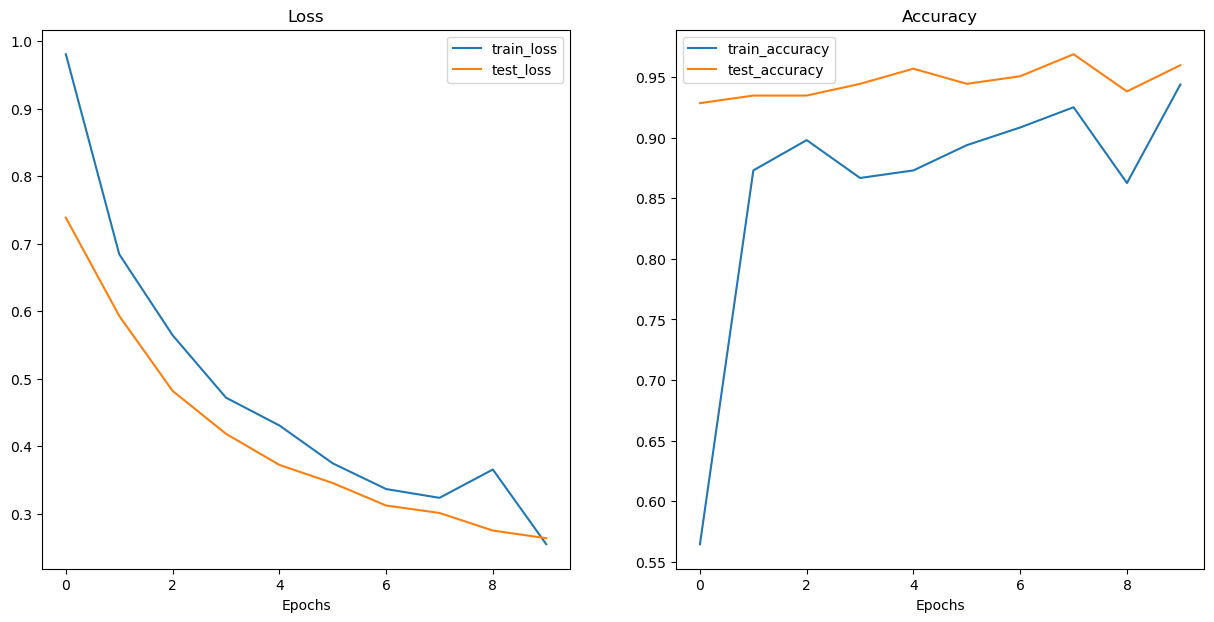

In [12]:
from helper_functions import plot_loss_curves

plot_loss_curves(effnetb2net_results)

Those are some nice looking loss curves.

<div class='alert alert-success'>
    
It looks like our model is `performing quite well` and perhaps would `benefit from a little longer training and potentially some data augmentation` (to help prevent potential overfitting occurring from longer training).

</div>

### 3.5 Saving EffNetB2 feature extractor

Now we've got a well-performing trained model, let's save it to file so we can import and use it later.

TO save our model we can use the `utils.save_model()` function created in `05. PyTorch Going Modular section 5`

We'll set the `target_dir` to `"models"` and the `model_name` to `"09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"` (a little comprehensive but at least we know what's going on).

In [13]:
from going_modular.going_modular import utils

# Save the model
utils.save_model(model=effnetb2,
                 target_dir="models",
                 model_name="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


### 3.6 Checking the size of EffNetB2 feature extractor

Since one of our criteria for deploying a model to power FoodVision is **speed**(~30FPS or better), let's check the size of our model.

***Why check the size?***

Well, while not always the case, the size of a model can influence its inference speed.

As in, if a model has more parameters, it generally performs more operations and each one of these operations requires some computing power.

And because we'd like our model to work on devices with limited computing power(eg. on a mobile device or in a web browser), generally, ***the smaller the size the better*** ( as long as it sill performs well in terms of accuracy)

To check our model's size in bytes, we can use Python's `pathlib.Path.stat('path_to_model').st_size` and then we can convert it (roughly) to megabytes by dividing it by (`1024x1024`)

In [11]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_model_size = Path('models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth').stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 

print(f"Pretrained EffNetB2 feature extractor model size: {pretrained_effnetb2_model_size} MB")

Pretrained EffNetB2 feature extractor model size: 29 MB


In [12]:
!du -h  models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth

 30M	models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth


### 3.7 Collecting EffNetB2 feature extractor stats

We've got a few statistics about our EffNetB2 feature extractor model such as test loss, test accuracy and model size, how about we collect them all in a dictionary so we can compare them to upcoming ViT feature extractor.

And we'll calculate an extra one for fun, total number of parameters.

We can do so by counting the number of elements(or patterns/weights) in `effnetb2.parameters()`. We'll access the number of elements in each parameter using the `torch.numel()` (short for `number of elements`) method.

In [16]:
# Count the number of parameters in EffNetB2
effnetb2_total_params = sum(torch.numel(param) for param in effnetb2.parameters())
effnetb2_total_params

7705221

Now, let's everything together in a dictionary, so that we can do comparisons later on.

In [17]:
# Create a dictionary with EffNetB2 statistics
effnetb2_stats = {"test_loss": effnetb2net_results["test_loss"][-1],
                  "test_acc": effnetb2net_results["test_acc"][-1],
                  "number_of_parameters": effnetb2_total_params,
                  "model_size (MB)": pretrained_effnetb2_model_size}
effnetb2_stats

{'test_loss': 0.26394857168197633,
 'test_acc': 0.959659090909091,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

In [54]:
effnetb2_stats = {'test_loss': 0.26394857168197633,
 'test_acc': 0.959659090909091,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29}

Looks like our EffNetB2 model is performing at over 95% accuracy!

- [X] `Criteria number 1`: perform at 95%+ accuracy, **tick!**

## 4. Creating a ViT feature extractor

Time to continue with our FoodVision Mini modelling experiments.

This time we're going to create a ViT feature extractor.

And we'll do it much the same way as the EffNetB2 feature extractor except this time with `torchvision.models.vit_b_16` instead of `torchvision.models.efficientnet_b2()`

We'll start by creating a function called `create_vit_model()` which will be vary similar to `create_effnetb2_model()` except of course returning a ViT extractor model and transforms rather than EffNetB2.

Another slight difference is that `torchvision.models.vit_b_16()`'s output layer is called `heads` rather than `classifier`

In [30]:
# Check out ViT heads layer
vit = torchvision.models.vit_b_16()
vit.heads

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)

Knowing this, we've got all the pieces of the puzzle we need.

In [31]:
def create_vit_model(num_classes:int=3, 
                     seed:int=42):
    """Creates a ViT-B/16 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of target classes. Defaults to 3.
        seed (int, optional): random seed value for output layer. Defaults to 42.

    Returns:
        model (torch.nn.Module): ViT-B/16 feature extractor model. 
        transforms (torchvision.transforms): ViT-B/16 image transforms.
    """
    # Create ViT_B_16 pretrained weights, transforms and model
    weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.vit_b_16(weights=weights)

    # Freeze all layers in model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head to suit our needs (this will be trainable)
    torch.manual_seed(seed)
    model.heads = nn.Sequential(nn.Linear(in_features=768, # keep this the same as original model
                                          out_features=num_classes)) # update to reflect target number of classes
    
    return model, transforms

Let's test it out.


In [32]:
# Create ViT model and transforms
vit, vit_transforms = create_vit_model(num_classes=3,
                                       seed=42)

Now let's get a nice-looking summary of our ViT model using torchinfo.summary()

In [16]:
from torchinfo import summary

# # Print ViT feature extractor model summary (uncomment for full output)
summary(vit, 
        input_size=(1, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 3]               768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

Just like our EffNetB2 feature extractor model, our ViT model's base layers are frozen and the output layer is customized to our needs!

***Do you notice the big difference though?***

Our ViT model has far more parameters than our EffNetB2 model. 
- Perhaps this will come into play when we compare our models across speed and performance later on.

### 4.1 Create DataLoaders for ViT

We've got our ViT model ready, now let's create some `DataLoader`'s for it.

We'll do this in the same way we did for EffNetB2 except we'll use `vit_transforms` to transform our images into the same format the ViT model was trained on.

In [17]:
# Setup ViT DataLoaders
from going_modular.going_modular import data_setup
train_dataloader_vit, test_dataloader_vit, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                       test_dir=test_dir,
                                                                                       transform=vit_transforms,
                                                                                       batch_size=32)

4.2 Training ViT feature extractor

You know what this is it..

..it's a trainingggg time.

Let's train our ViT feature extractor model for 10 epochs using our `engine.train()` function with `torch.optim.Adam()` and learning rate of 1e-3 as our optimizer and `torch.nn.CrossEntropyLoss()` as our loss function.

We'll use our `set_seeds()` function before training to try and make our results as reproducible as possible.

In [23]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=vit.parameters(),
                             lr=1e-3)
# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Train ViT model with seeds set for reproducibility
set_seeds()
vit_results = engine.train(model=vit,
                           train_dataloader=train_dataloader_vit,
                           test_dataloader=test_dataloader_vit,
                           epochs=10,
                           optimizer=optimizer,
                           loss_fn=loss_fn,
                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7023 | train_acc: 0.7500 | test_loss: 0.2714 | test_acc: 0.9290
Epoch: 2 | train_loss: 0.2531 | train_acc: 0.9104 | test_loss: 0.1669 | test_acc: 0.9602
Epoch: 3 | train_loss: 0.1766 | train_acc: 0.9542 | test_loss: 0.1270 | test_acc: 0.9693
Epoch: 4 | train_loss: 0.1277 | train_acc: 0.9625 | test_loss: 0.1072 | test_acc: 0.9722
Epoch: 5 | train_loss: 0.1163 | train_acc: 0.9646 | test_loss: 0.0950 | test_acc: 0.9784
Epoch: 6 | train_loss: 0.1270 | train_acc: 0.9375 | test_loss: 0.0830 | test_acc: 0.9722
Epoch: 7 | train_loss: 0.0899 | train_acc: 0.9771 | test_loss: 0.0844 | test_acc: 0.9784
Epoch: 8 | train_loss: 0.0928 | train_acc: 0.9812 | test_loss: 0.0759 | test_acc: 0.9722
Epoch: 9 | train_loss: 0.0933 | train_acc: 0.9792 | test_loss: 0.0729 | test_acc: 0.9784
Epoch: 10 | train_loss: 0.0662 | train_acc: 0.9833 | test_loss: 0.0642 | test_acc: 0.9847


### 4.3 Inspecting ViT loss curves

Now that our ViT model is trained, lets get visual and see some loss curves

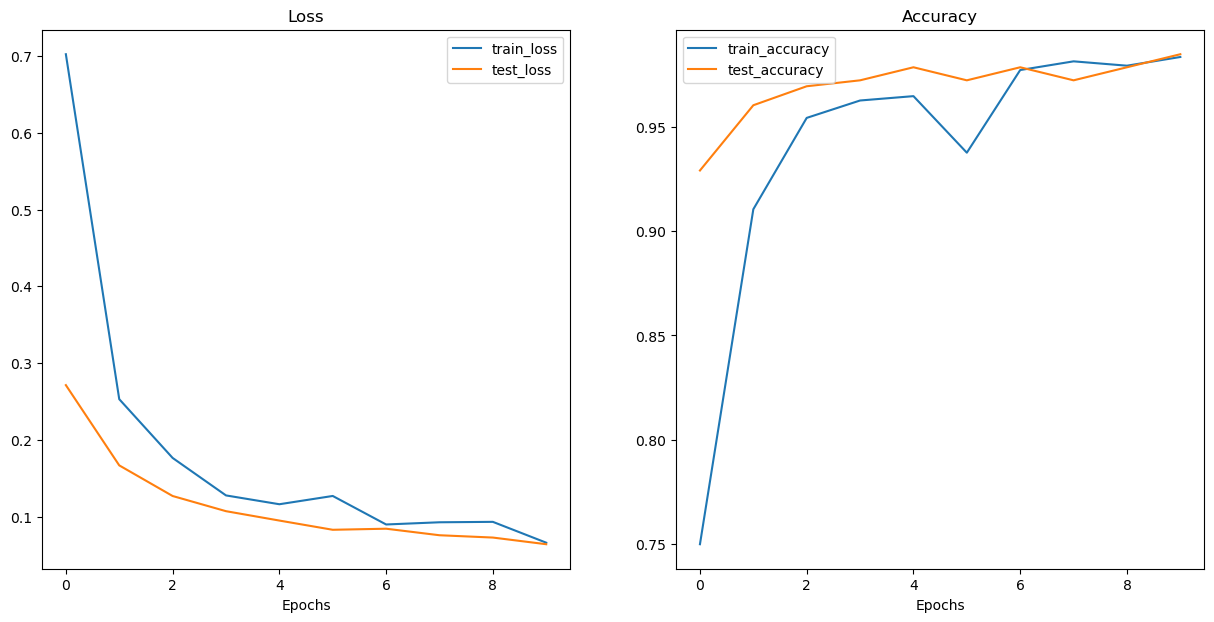

In [24]:
from helper_functions import plot_loss_curves

plot_loss_curves(vit_results)

GREAT!!🎉

Those are some nice looking loss curves. Just like our EffNetB2 feature extractor model, it looks our ViT model might benefit from a little longer trainng time and perhaps some [data augmentation](https://www.learnpytorch.io/04_pytorch_custom_datasets/#6-other-forms-of-transforms-data-augmentation) (to help prevent overfitting)

### .4. Saving ViT feature extractor

Our ViT model is performing outstanding!

So let's save it to file so we can import it and use it later if we wish.

We can do so using the `utils.save_model()` function we created in `05. PyTorch Going Modular section 5`

In [26]:
# save the model
from going_modular.going_modular import utils

utils.save_model(model=vit,
                 target_dir='models',
                 model_name="09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth")

[INFO] Saving model to: models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


### 4.5. Checking the size of ViT feature extractor

And since we want to compare our EffNetb2 to our ViT model across a number of charateristics, let's find out its size.

To check our model's size in bytes, we can use Python's `pathlib.Path.stat('path_to_model').st_size` and then we can convert it (roughly) to megabytes by diviging it by (1024x1024)

In [18]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_vit_model_size = Path("models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth").stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained ViT feature extractor model size: {pretrained_vit_model_size} MB")

Pretrained ViT feature extractor model size: 327 MB


Check the size using terminal command.

In [19]:
!du -h models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth

327M	models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth


Hmm, how does the ViT feature extractor model size compare to our EffNetB2 model size?

We'll find this out shortly when we compare all of our model's characteristics.

### 4.6. Collecting ViT feature extractor stats

Let's put together all of our ViT feature extractor model statistics.

We saw it in the summary output above but we'll calculate its total number of parameters.

In [20]:
# count the number of parameters in ViT
vit_total_params = sum(torch.numel(param) for param in vit.parameters())
vit_total_params

85800963

Looks like the parameters for ViT is a bit more than EffNetB2!

***Note:** A larger number of parameters (weights/patterns) genrally means a model has a higher capacity to learn, whether it actually uses this extra capacity is another story. In light of this, our EffNetB2 model has 7,705,221 paramters where as our ViT model has 85,800,963 (11.1x more) so we could assume that our ViT model has more of a capacity to learn, if given more data (more opportunities to learn). However, this larger capacity to learn often comes with an increased model filesize and a longer time to perform inference.*

Now let's create a dictionary with some important characteristics of our ViT model.

In [31]:
# Create ViT statistics dictionary
vit_stats = {"test_loss": vit_results["test_loss"][-1],
             "test_acc": vit_results["test_acc"][-1],
             "number_of_parameters": vit_total_params,
             "model_size (MB)": pretrained_vit_model_size}

vit_stats

{'test_loss': 0.06418205103836953,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

In [53]:
vit_stats = {'test_loss': 0.06418205103836953,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327}

Great! Our ViT model has more than 95% accuracy as well.

In [33]:
effnetb2_state_dict = torch.load('models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth')
effnetb2.load_state_dict(effnetb2_state_dict)

vit_state_dict = torch.load('models/09_pretrained_vit_feature_extractor_pizza_steak_sushi_20_percent.pth')
vit.load_state_dict(vit_state_dict)

<All keys matched successfully>

In [34]:
summary(model=effnetb2,
       input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                                  Output Shape              Param #
EfficientNet                                            [1, 3]                    --
├─Sequential: 1-1                                       [1, 1408, 7, 7]           --
│    └─Conv2dNormActivation: 2-1                        [1, 32, 112, 112]         --
│    │    └─Conv2d: 3-1                                 [1, 32, 112, 112]         (864)
│    │    └─BatchNorm2d: 3-2                            [1, 32, 112, 112]         (64)
│    │    └─SiLU: 3-3                                   [1, 32, 112, 112]         --
│    └─Sequential: 2-2                                  [1, 16, 112, 112]         --
│    │    └─MBConv: 3-4                                 [1, 16, 112, 112]         (1,448)
│    │    └─MBConv: 3-5                                 [1, 16, 112, 112]         (612)
│    └─Sequential: 2-3                                  [1, 24, 56, 56]           --
│    │    └─MBConv: 3-6                        

## 5. Making predictions with our trained models and timing them

We've got a couple of trained models, both performing pretty well.

Now how about twe test them out doing what we'd like them to do?

As in, let's see how they go making predictions (performing inference).

We know both of our models are performing at over 95% accuracy on the test dataset, but `how fast are they??`

ideally, if we're deploying our FoodVision model to a mobile device so people can take photos of their food and identify it,` we'd like the predictions to happen at real-time (~30FPS)`.

`That's why our second criteria is: a fast model`

To find out how long eash of our models take to performance inference, let's create a function called `pred_and_store()` to iterate over each of the test dataset images one by one and perform a prediction.

We'll time each of the predictions as well as store the results in a common prediction format: a list of dictionaries, where:
1. Each element in the list is a single prediction
2. and each single prediction is a dictionary

***Note:** we time the predictions one by one rather than by batch because when our model is deployed, it will likely only be making aprediction on one image at a time. As in, someone takes a photo and our model preditions on that single image.*

Since we'd like to make predictions across all the images in the test set, let's fist get a list of all of the test image paths so we can iterate over them.

To do so, we'll use Python's `pathlib.Path('target_dir').glob('*/*.jpg'))` to find all of the filepaths in a target directory with the extension `.jpg` (all of our test images).


In [36]:
from pathlib import Path

# Get all test data paths
print(f"[INFO] Finding all filepaths ending with '.jpg' in directory: {test_dir}")
test_data_paths = list(Path(test_dir).glob('*/*.jpg'))
test_data_paths[:5]

[INFO] Finding all filepaths ending with '.jpg' in directory: data/pizza_steak_sushi_20_percent/test


[PosixPath('data/pizza_steak_sushi_20_percent/test/steak/413497.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2246332.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2475366.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/1982192.jpg'),
 PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2353677.jpg')]

### 5.1. Creating a function to make predictions across the test dataset.

Now we'e got a list of our test image paths, let's get to work on our `pred_and_store()` function:
1. Create a function that takes list of paths, a trained PyTorch model, a series of transforms(to prepare images), a list of target class names, and a target device.
2. Create an empty list to store prediction dictionaries(we want the function to return a list of dictionaries, one for each prediction).
3. Loop through the target input paths(steps 4-14 will happen inside the loop).
4. Create an empty dictionary for each iteration in the loop to store prediction values per sample.
5. Get the sample path and ground trugh class name (we can do this by inferring the class from the path).
6. Start the prediction timer using PyTHon's `timeit.default_timer()`
7. Open the image using `PIL.Image.open(path)`
8. Transform the image so it's capable of being used with the target model as well as add a batch dimension and send the image to the target device.
9. Prepare the model for inference by sending it to the target device and turning on `eval()` mode.
10. Turn on `torch.inference_mode()` and pass the target transformed image to the model and calculate the prediction probability using `torch.softmax()` and the target label using `torch.argmax()`
11. Add the prediction probability and prediction class to the prediction dictionary created in step 4. Also make sure the prediction probability is on the CPU so it can be used with non-GPU libraries such as Numpy and Pandas for later inspection.
12. End the prediction timer started in step 6 and add the time to the prediction dictionary crate in step 4.
13. Append the updated prediction dictionary to the emtpy list of predictions crreated in step 2.
14. Return the list of prediction dictionaries.

A bunch of steps, but nothing we cannot handle!!!

In [45]:
from pathlib import Path
import torch

from PIL import Image
from timeit import default_timer as timer
from tqdm.auto import tqdm
from typing import List, Dict

# 1. Create a function to return a list of dictionaries with sample, truth label,
# prediction, prediction probability, and prediction time
def pred_and_store(paths: List[Path],
                   model: torch.nn.Module,
                   transform: torchvision.transforms,
                   class_names: List[str],
                   device: str = 'cuda' if torch.cuda.is_available() else 'cpu'
                  ) -> List[Dict]:
    # 2. Create an empty list to store prediction dictionaries
    pred_list = []

    # 3. Loop through target paths
    for path in tqdm(paths):
        # 4. Create an empty dictionary to store prediction information for each sample
        pred_dict = {}

        # 5. Get the sample path and ground trugh class name
        pred_dict['image_path'] = path
        class_name = path.parent.stem
        pred_dict['class_name'] = class_name

        # 6. Start the prediction timer
        start_time = timer()

        # 7. Open image path
        img = Image.open(path)
        
        # 8. Transform the image, add batch dimension, and put image on target device
        transformed_image = transform(img).unsqueeze(dim = 0).to(device)
        
        # 9. Preprare model for inference by sending it to the target device and turning on evaluation mode
        model.to(device)
        model.eval()

        # 10. Get prediction probabilities, prediction label, and prediction class
        with torch.inference_mode():
            pred_logit = model(transformed_image) # perform inference on target sample 
            pred_prob = torch.softmax(pred_logit, dim=1) # turn logits into prediction probabilities
            pred_label = torch.argmax(pred_prob, dim=1) # turn prediction probabilities into prediction label
            pred_class = class_names[pred_label.cpu()] # hardcode prediction class to be on CPU

            # 11. Make sure thing in the dictionary are on CPU (required for inspection later on)
            pred_dict['pred_prob'] = round(pred_prob.unsqueeze(dim=0).max().cpu().item(), 4)
            pred_dict['pred_class'] = pred_class

            # 12. End the timer and calcuate time per pred
            end_time = timer()
            pred_dict['time_for_pred'] = round(end_time-start_time, 4)
        # 13. Does the  pred math the true label?
        pred_dict['correct'] = class_name == pred_class

        # 14. Add the dictionary to the list of preds
        pred_list.append(pred_dict)
    # 15. Return list of prediction dictionaries
    return pred_list

Great!!
We can store `pred_and_store()` as a utility function for making and storing predictions, it woulc be store to `going_modular.going_modular.predictions.py` for later use. 

### 5.2 Making and timing predictions with EffNetB2

Time to test our `pred_and_store()` function!

Let's start by using it to make predictions across the test dataset with our EffNetB2 model, paying attention to two details:
1. **Device** - We'll hard code the device parameter to use 'cpu' because when we deploy our model, we won't always have access to a 'cuda' (GPU) device.
   - Making the predictions on CPU will be a good indicator of speed of inference too because generally predictions on CPU devices are slower that GPU devices.
3. **Transforms** - We'll also be sure to set the `transform` parameter to `effnetb2_transforms` to make sure the images are opened and transformed int he same way our `effnetb2` model has been trained on.

In [46]:
# Make predictions across test dataset with EffNetB2
effnetb2_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                          model=effnetb2,
                                          transform=effnetb2_transforms,
                                          class_names=class_names,
                                          device="cpu") # make predictions on CPU 

  0%|          | 0/150 [00:00<?, ?it/s]

Let's inspect the first couple and see what they look like.

In [47]:
# Inspect the first 2 prediction dictionaries
effnetb2_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/413497.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.916,
  'pred_class': 'steak',
  'time_for_pred': 0.0988,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2246332.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9266,
  'pred_class': 'steak',
  'time_for_pred': 0.0622,
  'correct': True}]

It looks like our `pred_and_store()` function worked!!

Thanks to our list of dictionaries data structure, we've got plenty of useful information we can further inspect.

To do so, let's turn our list of dictionaries into a pandas DataFrame.

In [49]:
# Turn the test_pred_dicts into a DataFrame
import pandas as pd

effnetb2_test_pred_df = pd.DataFrame(effnetb2_test_pred_dicts)
effnetb2_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/4...,steak,0.9160,steak,0.0988,True
1,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9266,steak,0.0622,True
2,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9110,steak,0.0631,True
3,data/pizza_steak_sushi_20_percent/test/steak/1...,steak,0.7857,steak,0.0655,True
4,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.5878,steak,0.0613,True


Great!!

Look how easily those prediction dictionaries turn into a structured format we can perform analysis on.

Such as finding how many predictions our EffNetB2 model got wrong..

In [51]:
# Check number of correct predictions
effnetb2_test_pred_df['correct'].value_counts()

correct
True     144
False      6
Name: count, dtype: int64

Six wrong predictions, not bad.

And how about the averate prediction time?

In [52]:
# Find the average time per prediction 
effnetb2_average_time_per_pred = round(effnetb2_test_pred_df['time_for_pred'].mean(), 4)
print(f"EffNetB2 average time per prediction: {effnetb2_average_time_per_pred} seconds")

EffNetB2 average time per prediction: 0.0631 seconds


Hmm, how does that average prediction time live up to our criteria of our model performing at real-time (`~30FPS or 0.03 seconds per prediction`)?

***Note:** Prediction times will be different across different hardware types (e.g. a local Intel i9 vs Google Colab CPU). The better and faster the hardware, generally, the faster the prediction. For example, on my local deep learning PC with an Intel i9 chip, my average prediction time with EffNetB2 is around 0.031 seconds (just under real-time). However, on Google Colab (I'm not sure what CPU hardware Colab uses but it looks like it might be an Intel(R) Xeon(R)), my average prediction time with EffNetB2 is about 0.1396 seconds (3-4x slower).*

Let's add our EffNetB2 average time per prediction to our `effnetb2_stats` dictionary.

In [55]:
# Add EffNetB2 average prediction time to stats dictionary 
effnetb2_stats["time_per_pred_cpu"] = effnetb2_average_time_per_pred
effnetb2_stats

{'test_loss': 0.26394857168197633,
 'test_acc': 0.959659090909091,
 'number_of_parameters': 7705221,
 'model_size (MB)': 29,
 'time_per_pred_cpu': 0.0631}

### 5.3 Making and timing predictions with ViT¶

We've made predictions with our EffNetB2 model, now let's do the same for our ViT model.

To do so, we can use the `pred_and_store()` function we created above except this time we'll pass in our `vit model` as well as the `vit_transforms`.

And we'll keep the predictions on the CPU via `device="cpu"` (a natural extension here would be to test the prediction times on CPU and on GPU).

In [56]:
# Make list of prediction dictionaries with ViT feature extractor model on test images
vit_test_pred_dicts = pred_and_store(paths=test_data_paths,
                                     model=vit,
                                     transform=vit_transforms,
                                     class_names=class_names,
                                     device="cpu")

  0%|          | 0/150 [00:00<?, ?it/s]

Predictions made!

Now let's check out the first couple.

In [57]:
# Check the first couple of ViT predictions on the test dataset
vit_test_pred_dicts[:2]

[{'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/413497.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.7901,
  'pred_class': 'steak',
  'time_for_pred': 0.0811,
  'correct': True},
 {'image_path': PosixPath('data/pizza_steak_sushi_20_percent/test/steak/2246332.jpg'),
  'class_name': 'steak',
  'pred_prob': 0.9981,
  'pred_class': 'steak',
  'time_for_pred': 0.076,
  'correct': True}]

Great!

And just like before, since our ViT model's predictions are in the form of a list of dictionaries, we can easily turn them into a pandas DataFrame for further inspection.

In [58]:
# Turn vit_test_pred_dicts into a DataFrame
import pandas as pd
vit_test_pred_df = pd.DataFrame(vit_test_pred_dicts)
vit_test_pred_df.head()

,image_path,class_name,pred_prob,pred_class,time_for_pred,correct
0,data/pizza_steak_sushi_20_percent/test/steak/4...,steak,0.7901,steak,0.0811,True
1,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9981,steak,0.0760,True
2,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9959,steak,0.0750,True
3,data/pizza_steak_sushi_20_percent/test/steak/1...,steak,0.9858,steak,0.0754,True
4,data/pizza_steak_sushi_20_percent/test/steak/2...,steak,0.9516,steak,0.0739,True


How many predictions did our ViT model get correct?

In [59]:
# Count the number of correct predictions
vit_test_pred_df.correct.value_counts()

correct
True     148
False      2
Name: count, dtype: int64

Woah!!

Our ViT model did a little better than our EffNetB2 model in terms of correct predictions, only two samples wrong across the whole test dataset.

As an extension you might want to visualize the ViT model's wrong predictions and see if there's any reason why it might've got them wrong.

**`How about we calculate how long the ViT model took per prediction?`**

In [60]:
# Calculate average time per prediction for ViT model
vit_average_time_per_pred = round(vit_test_pred_df.time_for_pred.mean(), 4)
print(f"ViT average time per prediction: {vit_average_time_per_pred} seconds")

ViT average time per prediction: 0.0757 seconds


Well, that looks a little slower than our EffNetB2 model's average time per prediction but ***how does it look in terms of our second criteria: speed?***

For now, let's add the value to our vit_stats dictionary so we can compare it to our EffNetB2 model's stats.

***Note: The average time per prediction values will be highly dependent on the hardware you make them on. For example, for the ViT model, my average time per prediction (on the CPU) was 0.0631-0.0757 seconds on my local deep learning PC with an Intel i9 CPU. Where as on Google Colab, my average time per prediction with the ViT model was 0.6766-0.7113 seconds***

In [61]:
# Add average prediction time for ViT model on CPU
vit_stats["time_per_pred_cpu"] = vit_average_time_per_pred
vit_stats

{'test_loss': 0.06418205103836953,
 'test_acc': 0.984659090909091,
 'number_of_parameters': 85800963,
 'model_size (MB)': 327,
 'time_per_pred_cpu': 0.0757}

## 6. Comparing model results, prediction times and size

Our two best model contenders have been trained and evaluated.

Now **let's put them head to head and compare** across their different statistics.

To do so, let's turn our `effnetb2_stats` and `vit_stats` dictionaries into a pandas DataFrame.

We'll **add a column to view the *model names* as well as *convert the test accuracy to a whole percentage* rather than decimal**.

In [62]:
# Turn stat dictionaries into DataFrame
df = pd.DataFrame([effnetb2_stats, vit_stats])

# Add column for model names
df["model"] = ["EffNetB2", "ViT"]

# Convert accuracy to percentages
df["test_acc"] = round(df["test_acc"] * 100, 2)

df

,test_loss,test_acc,number_of_parameters,model_size (MB),time_per_pred_cpu,model
0,0.263949,95.97,7705221,29,0.0631,EffNetB2
1,0.064182,98.47,85800963,327,0.0757,ViT


Great!

It seems our models are quite close in terms of overall test accuracy but how do they look across other fields?

One way to find out would be to `divide the ViT model statistics by the EffNetB2 model statistics` to find out the different `ratios between the models`.

Let's create another DataFrame to do so.

In [63]:
# Compare ViT to EffNetB2 across different characteristics
pd.DataFrame(data=(df.set_index("model").loc["ViT"] / df.set_index("model").loc["EffNetB2"]), # divide ViT statistics by EffNetB2 statistics
             columns=["ViT to EffNetB2 ratios"]).T

,test_loss,test_acc,number_of_parameters,model_size (MB),time_per_pred_cpu
ViT to EffNetB2 ratios,0.243161,1.02605,11.135432,11.275862,1.199683


It seems our ViT model outperforms the EffNetB2 model across the performance metrics (test loss, where lower is better and test accuracy, where higher is better) but at the expense of having:
- 11x+ the number of parameters.
- 11x+ the model size.
- 1.2x+ the prediction time per image.

Are these tradeoffs worth it?

Perhaps if we had unlimited computing power but for our use case of deploying for FoodVision model to a smaller device (e.g. a mobile phone), we'dl ikely start with the EffNetB2 model for faster predictions at a slightly reduced performance but drastically smaller size.

### 6.1 Visualizing the speed vs performance tradeoff

We've seen that our `ViT model outperforms our EffNetB2 model` in terms of performance metrics such as `test loss and test accuracy`.

However, our EffNetB2 model performs predictions faster and has a much smaller model size.

**Note**: Performance or inference time is also often referred to as ***"latency"***.

How about we make this fact visual?

We can do so by creating a plot with matplotlib:
1. Create a scatter plot from the comparison Dataframe to compare EffNetB2 and ViT `time_per_pred_cpu` and `test_acc` values.
2. Add titles and labels respective of the data and customize the fontsize for aesthetics.
3. Annotate the samples on the scatter plot from step 1 with their appropriate labels (the model names).
4. Create a legend based on the model sizes (`model_size (MB)`).

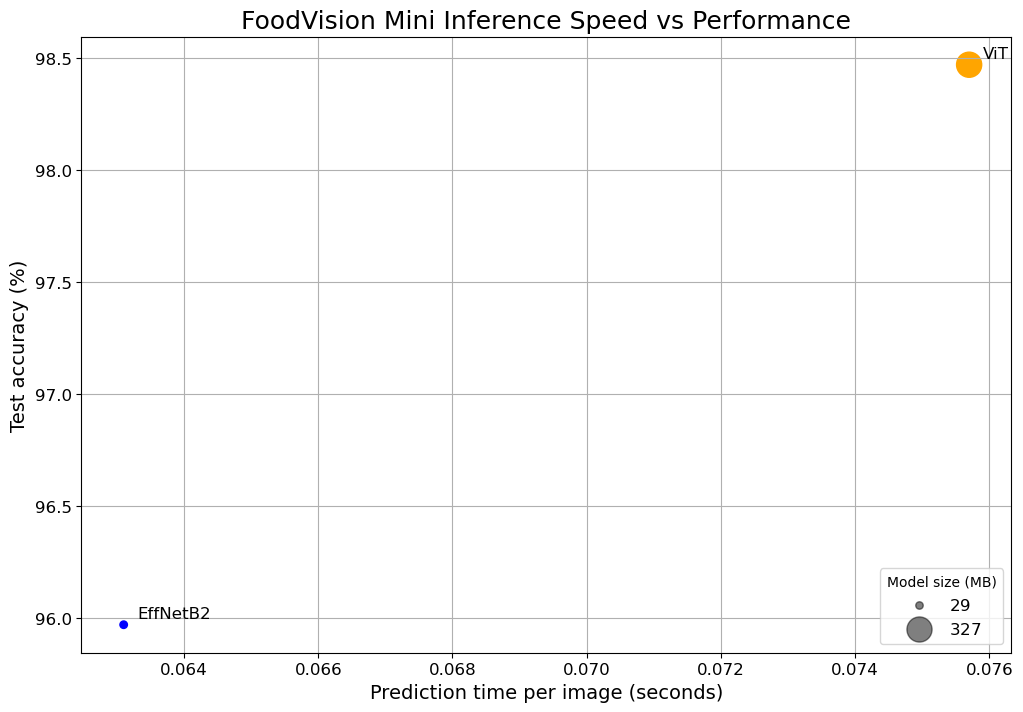

In [69]:
# 1. Create a plot from model comparison DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data=df, 
                     x="time_per_pred_cpu", 
                     y="test_acc", 
                     c=["blue", "orange"], # what colours to use?
                     s="model_size (MB)") # size the dots by the model sizes
# 2. Add titles, labels and customize fontsize for aesthetics
ax.set_title("FoodVision Mini Inference Speed vs Performance", fontsize=18)
ax.set_xlabel("Prediction time per image (seconds)", fontsize=14)
ax.set_ylabel("Test accuracy (%)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)

# 3. Annotate with model names
for index, row in df.iterrows():
    ax.annotate(text=row["model"], # note: depending on your version of Matplotlib, you may need to use "s=..." or "text=...", see: https://github.com/faustomorales/keras-ocr/issues/183#issuecomment-977733270 
                xy=(row["time_per_pred_cpu"]+0.0002, row["test_acc"]+0.03),
                size=12)

# 4. Create a legend based on model sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.5)
model_size_legend = ax.legend(handles, 
                              labels, 
                              loc="lower right", 
                              title="Model size (MB)",
                              fontsize=12)
# Save the figure
!mkdir images/
plt.savefig("images/09-foodvision-mini-inference-speed-vs-performance.jpg")

# Show the figure
plt.show()

Great!!

This plot visualizes the **speed vs performance tradeoff**, in toher words, when you have a larger, better performing deep model *like our ViT model), it genrally takes longer to perform inference (higher latency).

**There are exceptions to the rule and new research is being published all the time to help make larger models perform faster.**

And it can be tempting to just deploy the *best performing* model but it's also good to take into consideration where the model is going to be performing.

In our case, the differences between our model's performance levels(on the test loss and test accuracy) aren't too extreme.

But since we'd like to put an emphasis on speed to begin with, we're going to stick with deploying EffNetB2 since it's faster and has a much saller footprint.

***Note:** Prediction times will be different across different hardware types (e.g. Intel i9 vs Google Colab CPU vs GPU) so it's important to think about and test where your model is going to end up. Asking questions like "where is the model going to be run?" or "what is the ideal scenario for running the model?" and then running experiments to try and provide answers on your way to deployment is very helpful.*

## 7. Bring FoodVision to life by creating a Gradio Demo

We've decided we'd like to deploy the EffNetB2 model (to begin with, this could always be changed later).

So how can we do that?

There are several ways to deploy a machine learning model wach with specific use cases (as discussed above).

We're going to be focused on perhaps the quickest and certainly one of the most fun ways to get a model deployed to the internet.

And thats' by using [Gradio](https://www.gradio.app/)

***What's Gradio?***

The homepage describes it beautifully: 
> Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!

**Why create a demo of your models?**

Because metrics on the test set look nice but you never really know how your model performs until you use it in the wild.

So let's get deploying:

We'll start by importing Gradio with the common alias `gr` and if it's not present, we'll install it.

In [74]:
# Import/install Gradio 
try:
    import gradio as gr
except: 
    !pip -q install gradio
    import gradio as gr
    
print(f"Gradio version: {gr.__version__}")

Gradio version: 4.44.0


Great!

Lets turn FoodVision into a demo application.

### 7.1 Gradio overview

The overall premise of Gradio is very similar to what we've been repeating throughout the course.

What are our **inputs** and **outputs**?

And how should we get there?

Well that's what our machine leanring model does.

```
inputs -> ML model -> outputs
```

In our case, for FoodVision, out inputs are images of food, our ML model (EffNetB2) and outputs are the classes of food (pizza, steak, or sushi).

```
images of food -> EffNetB2 -> outputs
```

Though the concepts of inputs and ouptuts can be bridged to almost any other kind of ML problem. 

Our inputs and outputs might be any combination of the following:
 - Images
 - Texts
 - Videos
 - Tabular data
 - Audio
 - Numbers
 - and more

And the ML model you built will depend on your inputs and outputs.

Gradio emulates this paradigm by creating an inferface (`gradio.Interface()`) from inputs to outputs.
```
gradio.Interface(fn, inputs, outputs)
```

where, `fn` is a Python function to map the `inputs` to the `outputs`
![](09-gradio-workflow.png)

*Gradio provides a very helpful `Inferface` class to easily create an `inputs -> model/function -> outputs` workflow where the inputs and outputs could be almost anything you want. For example, you might input Tweets (text) to see if they're about machine learning or not or [input a text prompt to generate images](https://huggingface.co/blog/stable_diffusion)*

***Note:** Gradio has a vast number of possible `inputs` and `outputs options knows as `Components` from images to texts to numbers to audio to video and more. You can see all of them in the [Gradio Components documentation](https://www.gradio.app/docs/#components)

### 7.2 Create a function to map our inputs and outputs

To create our FoodVision demo with Gradio, we'll need a function to map our inputs to our outputs.

We created a function earlier called `pred_and_store()` to make predictions with a given model across a list of target files and store them in a list of dictionaries.

How about we create a similar function but this time focusing on making a prediction on a single image with our EffNetB2 model??

More specifically, we want a function that takes an image as input, preprocesses (transforms) it, makes a prediction with EffNetB3 and then returns the prediction (pred or pred label for short) as well as the prediction probability(pred_prob).

And while we're here, lets return the time it took to do so too:

```
input: image -> transform -> predict with EffNetB2
```
```
output: pred, pred prob, time taken
```

This will be our `fn` parameter for our Gradio interface.

First, let's make sure EffNetB2 model is on the CPU (since we're sticking with CPU-only predictions, however we could change this if we have access to a GPU).

In [75]:
# put EffNetB2 on a CPU
effnetb2.to('cpu')

# check the device
next(iter(effnetb2.parameters())).device

device(type='cpu')

And now let's create a function called `predict()` to replicate the workflow above.

In [80]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """
    Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class 
    # this is the required format for Gradio's output parameter
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

Now let's see our function in action by performing aprediction on a random image from the test dataset.

We'll start by getting a list of all the image paths from the test directory and then randomly selecting one.

Then we'll open the randomly selected image with `PIL.Image.open()`.

Finally we'll pass the image to our `predict()` function.

In [88]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: data/pizza_steak_sushi_20_percent/test/sushi/1844723.jpg

Prediction label and probability dictionary: 
{'pizza': 0.052008844912052155, 'steak': 0.12069028615951538, 'sushi': 0.8273008465766907}
Prediction time: 0.05934 seconds


Great!

Running the cell above a few times we can see different prediction probabilities for each label from our EffNetB2 model as well as the time it took per prediction.

### 7.3 Creating a list of example images

Our `predict()` function enables us to go from `inputs -> transform -> ML model -> outputs`.

**Which is exactly what we need for our Graido demo.**

But before we create the demo, let's create one more thing: *a list of examples*.

Gradio's `Interface` class takes a list of `examples` as an optional parameter (`radio.Interface(examples=List[Any])`)

And the format for the `examples` parameter is a list of lists.

So let's create a list of lists containing random filepaths to out test images.

Three examples should be enough.

In [89]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['data/pizza_steak_sushi_20_percent/test/sushi/46797.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/sushi/2378406.jpg'],
 ['data/pizza_steak_sushi_20_percent/test/steak/670345.jpg']]

Great!

Our Gradio demo will showcase these as example inputs to our demo so people can try it out and see what it does without uploading any of their own data.

### 7.4 Building a Gradio Interface

Time to put everything together and bring our FoodVision demo to life!

Let's create a Gradio interface to replicate the workflow:

```
input: image -> transform -> predict with EffNetB2
output: pred, pred prob, time taken
```

We can do with the [`gradio.Interface()`](https://www.gradio.app/docs) class with the following parameters:
- `fn` - a Python function to map `inputs` to `outputs`, in our case `predict()` function
- `inputs` - the input to our interface, such as an image using `gradio.Image()` or image`
- `outputs` - the output of our interface once the `inputs` have gone through the `fn`, such as label using `gradio.Label()` (for our model's predicted labels) or number using `gradio.Number()`(for our model's prediction time
  - **Note**: Gradio comes with many `in-built inputs and outputs` options known as `Components`.
- `examples` - a list of examples to showcase for the demo.
- `title` - a string title of the demo.
- `description` - a string description of the demo.
- `article` - a reference note at the bottom of the demo.

Once we've created our demo instace of `gr.Interface()`, we can bring it to life using `gradio.Interface().launch()` or `demo.launch()` command

In [91]:
import gradio as gr

# create title, description, and article strings
title = 'FoodVision 🍕🥩🍣'
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create the Gradio demo
demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type='pil'),
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)
# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True) # generate a publically shareable URL?

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://194bee30a92c6e6146.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


the link when running from Google Colab only lasts for 72 hours). You can see the [permanent live demo on Hugging Face Spaces](https://huggingface.co/spaces/mrdbourke/foodvision_mini).

Woohoo!!! What an epic demo!!!

FoodVision Mini has officially come to life in an interface someone could use and try out.

If we set the parameter `share=True` in the `launch()` method, Gradio also provides us with a shareable link such as `https://194bee30a92c6e6146.gradio.live/` (this link is an example only and likely expired) which is valid for 72-hours.

The link provides a proxy back to the Gradio interface you launched.

For more permanent hosting, we can upload our Gradio app to [Hugging Face Spaces](https://huggingface.co/spaces) or anywhere that runs Python code.

## 8. Turning our FoodVision Gradio Demo into a deployable app

We've seen our FoodVision model come to life through a Gradio demo.

But what if we wanted to share it with our friends?

Well, we could use the provided Gradio link, however, the shared link only lasts for 72-hours.

To make our FoodVision Mini demo more permanent, we can package it into an app and upload it to [HuggingFace Spaces](https://huggingface.co/spaces/launch).

### 8.1 What is a HuggingFace Spaces?

HuggingFaces Spaces is a resource that allows you to host and share machine learning apps.

Building a demo is one of the best ways to showcase and test what you've done.

And Spaces allows you to do just that.

***You can think of HuggingFace as the GitHub of machine learning.***

If having a good GithHub portfolio showcases your coding abilities, having a good HuggingFace portfolio can showcase your machine learning abilitites.

***Note:** There are many other palces we could upload and host our Gradio apps such as, `Google Cloud, AWS, or other cloud vendors`, however, we're going to use HuggingFace Spaces due to the ease of use and wide adoption by the machine learning community.*

### 8.2 Deployed Gradio app structure

To upload our demo Gradio app, we'll want to put everything relating to it into a single directory.

For example, our demo might live at the path `demos/foodvision_mini/` with the file structure:

```
demos/
└── foodvision_mini/
    ├── 09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
    ├── app.py
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    │   └── example_3.jpg
    ├── model.py
    └── requirements.txt
```

Where:
- `09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth` is our trained PyTorch model file.
- `app.py` contains our Gradio app (similar to the code that launched the app).
  - **Note:** `app.py` is the default filename used for HUgging Face Spaces, if you deploy your app there, Spaces will by default look for a file called `app.py` to run. This is changeable in settings.
  - `examples/` contains example images to use with our Gradio app.
  - `requirements.txt` contains the dependencies to run our app such as `torch`, `torchvision`, and `gradio`

***Why this way?**

Because it's one of the simplest layouts we could begin with.

Our focus is: *experiment, experiment, and experiment!*

The quicker we can run smaller experiments, the better our bigger ones will be. 

We're going to work towards recreating the structure above but you can see a live demo app running on Hugging Face Spaces as well as the file structure:
- [Live Gradio demo of FoodVision Mini 🍕🥩🍣](https://huggingface.co/spaces/mrdbourke/foodvision_mini).
- [FoodVision Mini file structure on Hugging Face Spaces](https://huggingface.co/spaces/mrdbourke/foodvision_mini/tree/main).

### 8.3 Creating a `demos` folder to store our FoodVision Mini app files.

To begin, let's first create a `demos/` directory to store all of our FoodVision app files.

We can do with Python's `pathlib.Path('path_do_dir')` to establish the directory path and `pathlib.Path('path_to_dir').mkdir()` to create it.

In [92]:
import shutil
from pathlib import Path

# Create FoodVision demo path
foodvision_mini_demo_path = Path('demos/foodvision_mini/')

# Remove files that might already exist there and create new directory
if foodvision_mini_demo_path.exists():
    shutil.rmtree(foodvision_mini_demo_path)

# if the file doesnt exist, create it anyway
foodvision_mini_demo_path.mkdir(parents=True, exist_ok=True)

# check what's in the folder
!ls demos/foodvision_mini/

### 8.4 Creating a folder of example images to use with our FoodVision demo

Now we've got a directory to store our FoodVision Mini demo files, let's add some examples to it.

Three example images from the test dataset should be enough.

To do so we'll:

1. Create an `examples/` directory within the `demos/foodvision_mini` directory.
2. Choose three random images from the test dataset and collect their filepaths in a list.
3. Copy the three random images from the test dataset to the `demos/foodvision_mini/examples/` directory.

In [94]:
import shutil
from pathlib import Path

# 1. Create an examples directory
foodvision_mini_examples_path = foodvision_mini_demo_path / 'examples'
foodvision_mini_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
foodvision_mini_examples = [Path('data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg'),
                            Path('data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg')]

# 3. Copy the three random images to the examples directory
for example in foodvision_mini_examples:
    destination = foodvision_mini_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying data/pizza_steak_sushi_20_percent/test/sushi/592799.jpg to demos/foodvision_mini/examples/592799.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/steak/3622237.jpg to demos/foodvision_mini/examples/3622237.jpg
[INFO] Copying data/pizza_steak_sushi_20_percent/test/pizza/2582289.jpg to demos/foodvision_mini/examples/2582289.jpg


Now to verify our examples are present, let's list the contents of our `demos/foodvision_mini/examples/` directory with `os.listdir()` and then format the filepaths into a list of lists (so it's compatible with Gradio's `gradio.Interface()` `example parameter)

In [97]:
import os

# Get example filepaths in a list of lists
example_list = [['examples/' + example] for example in os.listdir(foodvision_mini_examples_path)]
example_list

[['examples/2582289.jpg'], ['examples/592799.jpg'], ['examples/3622237.jpg']]

### 8.5 Moving our trained EffNetB2 model to our FoodVision mini demo directory.

We previously saved our FoodVision Mini EffNetB2 feature extractor model under `models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth`

And rather double up on saved model files, let's move our model to our `demos/foodvision_mini` directory.

We can do so using Python's [`shutil.move()`](https://docs.python.org/3/library/shutil.html#shutil.move) method and passing in `src` and `dst` parameters.

In [99]:
import shutil

# create a source path for our target model
effnetb2_foodvision_mini_model_path = 'models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth'

# Try to move the file
effnetb2_foodvision_mini_model_destination = foodvision_mini_demo_path / effnetb2_foodvision_mini_model_path.split("/")[1]

effnetb2_foodvision_mini_model_destination

# tryo to move the file
try:
    print(f"[INFO] Attempting to move {effnetb2_foodvision_mini_model_path} to {effnetb2_foodvision_mini_model_destination}")
    
    # move the model
    shutil.move(src=effnetb2_foodvision_mini_model_path,
                dst=effnetb2_foodvision_mini_model_destination)
    
    print(f"[INFO] Model move complete.")
# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {effnetb2_foodvision_mini_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {effnetb2_foodvision_mini_model_destination}: {effnetb2_foodvision_mini_model_destination.exists()}")

[INFO] Attempting to move models/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth to demos/foodvision_mini/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth
[INFO] Model move complete.


### 8.6 Turning our EffNetB2 model into a Python script (`model.py`)

Our current model's `state_dict` is saved to `demos/foodvision_mini/09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth`.

To load it in we can use `model.load_state_dict()` along with `torch.load()`.

But before we can do this, we first need a way to instantiate a `model`.

To do this in a modular fashion we'll create a script called `model.py` which contains our `create_effnetb2_model()` function we created in `section 3.1: Creating a function to make an EffNetB2 feature extractor`

That way we can import the function in *another* script (see `app.py` below) and then use it to create our EffNetB2 `model` instance as well as get its appropriate transforms.

Just like in 05. PyTorch Going Modular, we'll use the `%%writefile path/to/file` magic command to turn a cell of code into a file.

In [100]:
%%writefile demos/foodvision_mini/model.py
import torch
import torchvision

from torch import nn

def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """
    # create EffNetB2 pretrained weights, transforms, and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

    # freeze all the layers in the base model
    for param in model.features.parameters():
        param.requires_grad = False

    # change the classifier head with random seed for reproducibility
    torch.manual_seed(seed)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes)
    )

    return model, transforms

Writing demos/foodvision_mini/model.py


### 8.7 Turning our FoodVision Mini Gradio app into a Python script (`app.py`)

We've now got a `model.py` script as well as a path to a saved model `state_dict` that we can load in.

Time to construct `app.py`

We call it `app.py` because by default when we create a HuggingFace Space, it looks for a file called `app.py` to run and host (though you can change this in settings).

our `app.py` script will put together all of the pieces of the puzzle to create our Gradio demo and will have four main parts:
1. **Imports and class names setup** - Here we'll import the various dependencies for our demo including the `create_effnetb2_model()` function from `model.py` as well as setup the different class names for our FoodVision Mini app.
2. **Model and transforms preparation** - Here we'll create an EffNetB2 model instance along with the transforms to go with it and then we'll load in the saved model weights `state_dict`. When we load the model we'll also set `map_location=torch.device('cpu')` in `torch.load()` so our model gets loaded onto the CPU regardless of the device it trained on (we do this because we won't necessarily have a GPU when we deploy and we'll get an error if our model is trained on GPU but we try to deploy it to CPU without explicitly saying so),
3. **Predict function** - Gradio's `gradio.Interface()` takes an `fn` parameter to map inputs to outputs, our `predict()` function will be the same as the on we defined above in `section 7.2: Creating a function to map our inputs and outputs`, it will take in an image and then use the loaded transforms to preprocess it before using the loaded model to make a prediction on it.
   - **Note:** We'll have to create the example list on the fly via the `examples` parameter. We can do so by creating a list of the filest inside the `examples/` directory with: [[f'examples/{example}']for examples in os.listdir('examples')].
4. **Gradio app** - This is where the main logic of our demo will live, we'll create a `gradio.Interface()` instance called `demo` to put together our inputs, `predict()` function and outputs, And we'll finish the script by calling `demo.launch()` to launch our FoodVision demo!

In [102]:
%%writefile demos/foodvision_mini/app.py
### 1. Imports and class names setup ### 
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
class_names = ["pizza", "steak", "sushi"]

### 2. Model and transforms preparation ###

# Create EffNetB2 model
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=3, # len(class_names) would also work
)

# Load saved weights
effnetb2.load_state_dict(
    torch.load(
        f="09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    # Create examples list from "examples/" directory
                    examples=example_list, 
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()
# 1. Imports and class name
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# setup class name
class_names = ['pizza', 'steak', 'sushi']

# 2. Model and transforms preparation

# create effnetb2 model
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3)

# load saved weights
effnetb2.load_state_dict(
    torch.load(f='09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent',
               map_location = torch.device('cpu')
              )
)

# 3. predict function

# create predict function
def predict(img) -> Tuple[Dict, float]:
    """
    Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # start the timer
    start_time = timer()

    # transform the target img and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(dim=0)

    # put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    # create a prediction label and prediction probability dictionary for each prediction class
    # this is the required format for Gradio's output
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][1]) for i in range(len(class_names))}
    
    # end time
    end_time = timer()

    # calculate the prediction time
    pred_time = round(end_time - start_time, 5)

    return pred_labels_and_probs, pred_time

# 4. Gradio App

# Create titme, description, and article strings
title = "FoodVision Mini 🍕🥩🍣"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food as pizza, steak or sushi."
article = "Learned from [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# create examples list from 'examples/' directory
example_list = [[f'examples/{example}'] for example in os.listdir('examples')]

# Create the Gradio demo
demo = gr.Interface(fn=predict,
                    inputs=gr.Image(type='pil'),
                    outputs=[gr.Label(num_top_classes=3, label='Prediction'),
                            gr.Number(label='Prediction time(s)')],
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# launch the demo!
demo.launch()

Writing demos/foodvision_mini/app.py


### 8.8 Creating a requirements file for FoodVision (`requirements.txt`)

The last file we need to create for our FoodVision app is a `requirements.txt` file.

This will be a text file containing all of the required dependencies for our demo.

When we deploy our demo app to HuggingFace Spaces, it will search through this file and install the dependencies we define so our app can run.

The good news is, there's only three!
1. torch==2.2.2
2. torchvision==0.17.2
3. gradio==4.44.0
  
Defining the version number is not 100% required but we will for now so if any breaking updates occur in future releases, our app still runs

In [109]:
%%writefile demos/foodvision_mini/requirements.txt
torch==2.2.2
torchvision==0.17.2
gradio==4.44.0
numpy==1.26.4

Overwriting demos/foodvision_mini/requirements.txt


Nice!

We've officially got all the files we need to deploy our FoodVision Mini demo

## 9. Deploying our FoodVision app to HuggingFace Spaces

We've got a file containing our FoodVision demo, now how do we get it to run on HuggingFace Spaces?

There are two main options for uploading to a HuggingFace Space (also called a [`HuggingFace Repository`](https://huggingface.co/docs/hub/repositories-getting-started#getting-started-with-repositories), similar to a git repository):
1. [Uploading via the HuggingFace Web interface (easiest)](https://huggingface.co/docs/hub/repositories-getting-started#adding-files-to-a-repository-web-ui)
2. [Uploading via the command line or terminal](https://huggingface.co/docs/hub/repositories-getting-started#terminal)
   - **Bonus**: We can also use the `huggingface_hub` library to interact with Huggface, this would be a good extension to the above two options.

### 9.2 Running the FoodVision demo locally

1. Opening terminal or a command line prompt.
2. Changing into the `foodvision_mini` directory (`cd foodvision_mini`).
3. Creating an environment (`python3 -m venv env`).
4. Activating the environment (`source env/bin/activate`).
5. Installing the requirements (`pip install -r requirements.txt`, the `"-r"` is for recursive).
    - **Note:** This step may take 5-10 minutes depending on your internet connection. And if you're facing errors, you may need to upgrade pip first: `pip install --upgrade pip`.
7. Run the app (`python3 app.py`).

This should result in a Gradio demo just like the one we built above running locally on your machine at a URL such as `http://127.0.0.1:7860/`.

If you want, you can also use `zrok.io` so that others can use your application.

---

**Note:** If you run the app locally and you notice a `flagged/` directory appear, it contains samples that have been "flagged".

For example, if someone tries the demo and the model produces an incorrect result, the sample can be "flagged" and reviewed for later.

For more on flagging in Gradio, see the [flagging documentation](https://www.gradio.app/docs).

### 9.3 Uploading to HuggingFace

We've verified our FoodVision app works locally, however, the fun of creating a machine learning is to show it to other people and allow them to use it.

To do so, we're going to upload our FoodVision Mini demo to HuggingFace.

***Note**: The following series of steps uses a Git (a file tracking system) workflow. For more on how Git works, I'd recommend going through the Git and GitHub for Beginners tutorial on freeCodeCamp.*

1. Sign up for a Hugging Face account.
2. Start a new Hugging Face Space by going to your profile and then clicking "New Space".
3. Give the Space a name, for example, mine is called mahesh-hug-fac/foodvision_mini, you can see it here: https://huggingface.co/spaces/mahesh-hug-fac/foodvision_mini
4. Select a license (I used MIT).
5. Select Gradio as the Space SDK (software development kit).
    - ***Note**: You can use other options such as Streamlit but since our app is built with Gradio, we'll stick with that.*
6. Choose whether your Space is it's public or private (I selected public since I'd like my Space to be available to others).
7. Click "Create Space".
8. Clone the repo locally by running something like: git clone `https://huggingface.co/spaces/[YOUR_USERNAME]/[YOUR_SPACE_NAME]` in terminal or command prompt.
    - ***Note: You can also add files via uploading them under the "Files and versions" tab.*
9. Copy/move the contents of the downloaded `foodvision_mini` folder to the cloned repo folder.
10. To upload and track larger files (e.g. files over 10MB or in our case, our PyTorch model file) you'll need to [install Git LFS](https://git-lfs.com/) (which stands for "git large file storage").
11. After you've installed Git LFS, you can activate it by running `git lfs install`.
12. In the `foodvision_mini` directory, track the files over 10MB with Git LFS with `git lfs track "*.file_extension`".
    - Track EffNetB2 PyTorch model file with `git lfs track` `"09_pretrained_effnetb2_feature_extractor_pizza_steak_sushi_20_percent.pth"`.
13. Track .gitattributes (automatically created when cloning from HuggingFace, this file will help ensure our larger files are tracked with Git LFS). You can see an example `.gitattributes` file on the FoodVision Mini Hugging Face Space.
    - `git add .gitattributes`
14. Add the rest of the `foodvision_mini` app files and commit them with:
    - `git add *`
    - `git commit -m "first commit"`
15. Push (upload) the files to Hugging Face:
    - `git push`
16. Wait 3-5 minutes for the build to happen (future builds are faster) and your app to become live!

If everything worked, you should see a live running example of our FoodVision Mini Gradio demo like the one here: [https://huggingface.co/spaces/mahesh-hug-fac/foodvision_mini](https://huggingface.co/spaces/mahesh-hug-fac/foodvision_mini)

And we can even embed our FoodVision Mini Gradio demo into our notebook as an iframe with `IPython.display.IFrame `and a link to our space in the format `https://hf.space/embed/[YOUR_USERNAME]/[YOUR_SPACE_NAME]/+`.

In [110]:
# IPython is a library to help make Python interactive
from IPython.display import IFrame

# Embed FoodVision Mini Gradio demo
IFrame(src="https://hf.space/embed/mahesh-hug-fac/foodvision_mini/+", width=900, height=750)

## 10. Creating FoodVision Big

We've spend the past few sections and chapters working on bringing FoodVision Mini to life.

And now we've seen it working in a live demo, how about we step things up a notch?

***FoodVision Big!***

SInce FoodVision Mini is trained on pizza, steak, and sushi images from the [Food101 dataset](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html) (101 classes of food x 1000 images each).
 - How about we make **FoodVision Big** by training a model on all 101 classes!

**We'll go from three classes to 101!**

From pizza, steak, sushi to pizza, steak, sushi, hot dog, apple pie, carrot cake, chocolate cake, french fries, garlic bread, ramen, nachos, tacos and more!

**How?**

Well, we've got all the steps in a place, all we have to do is alter our EffNetB2 model slightly as well as prepare a different dataset.

To finish Milestone Project 3, let's recreate a Gradio demo similar to FoodVision Mini (3 classes) but for FoodVision Big (101 classes).
![](09-model-deployment-foodvision-mini-to-foodvision-big.png)

*FoodVision Mini works with three food classes: pizza, steak and sushi. And FoodVision Big steps it up a notch to work across 101 food classes: all of the [classes in the Food101 dataset](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt).*

### 10.1 Creating a model ans transforms for FoodVision Big
When creating FoodVision we saw that the EffNetB2 model was a good tradeoff between speed and performance (it performed well with a fast speed).

So we'll continue using the same model for FoodVision Big.

We can create an EffNetB2 feature extractor for Food101 by using `create_effnetb2_model()` function we created above, in `section 3.1`, and passing it the parameter `num_classes=101`(since Food101 has 101 classes)


In [112]:
# create EffNetB2 model capable of fitting to 101 classes for Food101
effnetb2_food101, effnetb2_transform = create_effnetb2_model(num_classes=101)

Great!

Now lets get a summary of our model.

In [113]:
from torchinfo import summary

summary(model=effnetb2_food101,
        input_size=(1,3,224,224),
        col_names=['input_size','output_size','num_params','trainable'],
        col_width=20,
        row_settings=['var_names']
       )

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [1, 3, 224, 224]     [1, 101]             --                   Partial
├─Sequential (features)                                      [1, 3, 224, 224]     [1, 1408, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)                              [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                                       [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                                  [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─SiLU (2)                                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─Sequential (1)                                        [1, 32, 112, 112]    [1, 1


Nice!

Just like our EffNetB2 model for FoodVision Mini, the base layers are frozen (these are pretrained on ImageNet) and the outer layers(the `classifier` layers) are trainable with an ouput shape of `[batch_size, 101]` (`101` for 101 classes in Food101]

Now since we're going to be dealing with a fair bit more data than usual, how about we add a little data augmentation to our transforms(`effnetb2_transforms`) to augment the training data.

***Note:** Data Augmentation is a technique used to alter the appearance of an input training sample (e.g. rotating an image or slighly skewing it) to artificially increase the diversity of a training dataset to hopefully prevent overfitting. We can see more on data augmentation in `04. PyTorch Custom Datasets section 6.*

Let's compose a `torchvision.transforms` pipeline to use `torchvision.transforms.TrivialAugmentWide()` (the same data augmentation used in the PyTorch team in their [computer vision recipe](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#break-down-of-key-accuracy-improvements) as well as the `effnetb2_transforms` to transform our training images.

In [116]:
# Create food101 training data transforms
food101_train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    effnetb2_transforms
])

Great!

Now let's compare food101_train_transforms (for the training data) and effnetb2_transforms (for the testing/inference data).

In [117]:
print(f"Training transforms:\n{food101_train_transforms}\n") 
print(f"Testing transforms:\n{effnetb2_transforms}")

Training transforms:
Compose(
    TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
    ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)
)

Testing transforms:
ImageClassification(
    crop_size=[288]
    resize_size=[288]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


### 10.2 Geting data for FoodVision Big

For FoodVision Mini, we made our own [custom data splits](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) of the entire Food 101 dataset.

To get the whole Food101 dataset, we can use [`torchvision.datasets.Food101()`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html)

We'll first setup a path to directory `data/` to store the images.

Then we'll download and transform the training and testing dataset splits using `food101_train_transforms` and `effnetb2_transforms` to transform each dataset respoectively.

In [121]:
from torchvision import datasets

# setup data directory
from pathlib import Path
data_dir = Path('data')

# get training data(~750 images x 101 food classes)
train_data = datasets.Food101(root=data_dir, # path to download data to
                              split='train', # dataset split to get
                              transform=food101_train_transforms, # perform data augmentation
                              download=True) # want to download?

# Get testing data (~250 images x 101 food classes)
test_data = datasets.Food101(root=data_dir,
                             split="test",
                             transform=effnetb2_transforms, # perform normal EffNetB2 transforms on test data
                             download=True)

100%|███████████████████████████████████| 4996278331/4996278331 [08:34<00:00, 9705938.96it/s]


Extracting data/food-101.tar.gz to data


Data downloaded!

Now we can get a list of all the class names using `train_data.classes`.

In [124]:
# Get Food101 class names
food101_class_names = train_data.classes

# View the first 10
food101_class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

Great!

Those are some delicious sounding foods. You can see a full list of the Food101 class names on the course GitHub under [extras/food101_class_names.txt](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt).

### 10.3 Creating a subset of the Food101 dataset for faster experimenting

This is optional.

We don't need to create another subset of the Food101 dataset, we could train and evaluate a model across the whole 101,000 images.

But to keep training fast, let's create a 20% split of the training and test datasets.

Our goal will be to see if we can beat the original [Food101 paper's](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) best result with only 20% of the data.

To breakdown the datsets we've used/will use:

| **Notebook(s)**|	**Project name**|	**Dataset**| **Number of classes**|	**Training images**|	**Testing images**|
|:-|:-|:-|:-|:-|:-|
|04, 05, 06, 07, 08|	FoodVision Mini (10% data)|	Food101 custom split|	3 (pizza, steak, sushi)|	225|	75|
|07, 08, 09|	FoodVision Mini (20% data)|	Food101 custom split|	3 (pizza, steak, sushi)|	450|	150|
|**09 (this one**)|	FoodVision Big (20% data)|	Food101 custom split|	101 (all Food101 classes)|	15150|	5050|
|Extension|	FoodVision Big|	Food101 all data|	101|	75750|	25250|

**Can you see the trend?**

Just like our model size slowly increased overtime, so has the size of the dataset we've been using for experiments.

***Note:** To truly beat the original Food101 paper's results with 20% of the data, we'd have to traina model on 20% of the training data and then evaluate our model on the whole test set rather than the split we created. I'll have this as an extension exercise for you to try. I'd also encourage you to try training a model on the entire Food101 training dataset.*

---

To make our FoodVision (20%) split, let's create a function called `split_dataset()` to split a given dataset into certain proportions.

We can use `torch.utils.data.random_split()` to create splits of given sizes using the `lengths` parameter.

**The `lengths` parameter accepts a list of desired split lengths where the total of the list must equal the overall length of the dataset.**

For example, with a dataset of size 100, you could pass in `lengths=[20, 80]` receive a 20% and 80% split.

We'll want our function to return two splits, one with the target length (e.g. 20% of the training data) and the other with the remaining length(e.g. the ramaining 80% of the training data).

Finally, we'll set `generator` parameter to a `torch.manual_seed()` value for reproducibility.

In [125]:
def split_dataset(dataset:torchvision.datasets,
                  split_size:float=0.2,
                  seed:int=42):
    """Randomly splits a given dataset into two proportions based on split_size seed.

    Args:
        dataset (torchvision.datasets): A PyTorch Dataset, typically one from torchvision.datasets.
        split_size (float, optional): How much of the dataset should be split? 
            E.g. split_size=0.2 means there will be a 20% split and an 80% split. Defaults to 0.2.
        seed (int, optional): Seed for random generator. Defaults to 42.

    Returns:
        tuple: (random_split_1, random_split_2) where random_split_1 is of size split_size*len(dataset) and 
            random_split_2 is of size (1-split_size)*len(dataset).
    """

    # Create split lengths based on original dataset length
    length_1 = int(len(dataset) * split_size) # desired length
    length_2 = len(dataset) - length_1 # remaining length

    # print out info
    print(f"[INFO] Splitting dataset of length {len(dataset)} into splits of size: {length_1} ({int(split_size*100)}%), {length_2} ({int((1-split_size)*100)}%)")

    # create splits with given random seed
    random_split_1, random_split_2 = torch.utils.data.random_split(dataset, lengths=[length_1, length_2],
                                                                   generator=torch.manual_seed(seed) # set the random seed for reproducible splits
                                                                  )
    return random_split_1, random_split_2

Dataset split function created!

Now let's test it out by creating a 20% training and testing dataset split of Food101.

In [126]:
# Create training 20% split of Food101
train_data_food101_20_percent, _ = split_dataset(dataset=train_data,
                                                 split_size=0.2)

# Create testing 20% split of Food101
test_data_food101_20_percent, _ = split_dataset(dataset=test_data,
                                                split_size=0.2)

len(train_data_food101_20_percent), len(test_data_food101_20_percent)

[INFO] Splitting dataset of length 75750 into splits of size: 15150 (20%), 60600 (80%)
[INFO] Splitting dataset of length 25250 into splits of size: 5050 (20%), 20200 (80%)


(15150, 5050)

### 10.4 Turning our Food101 datasets into `DataLoader`s

Now let's turn our Food101 20% dataset splits into `DataLoader` using `torch.utils.data.DataLoader()`

We'll set `shuffle=True` for the training data only and the batch size to `32` for both datasets.

And we'll set `num_workers` to `4` if the CPU count is available or `2` if it's not (though the value of `num_workers` is very experimental and will depend on the hardware you're using.

In [127]:
import os
import torch

BATCH_SIZE = 42
NUM_WORKERS = 2 if os.cpu_count() <=4 else 4

# create Food101 20 percent training DataLoader
train_dataloader_food101_20_percent = torch.utils.data.DataLoader(dataset=train_data_food101_20_percent,
                                                                  batch_size=BATCH_SIZE,
                                                                  shuffle=True,
                                                                  num_workers=NUM_WORKERS
                                                                 )

# create Food101 20 percent testing DataLoader
test_dataloader_food101_20_percent = torch.utils.data.DataLoader(dataset=test_data_food101_20_percent,
                                                                  batch_size=BATCH_SIZE,
                                                                  shuffle=False,
                                                                  num_workers=NUM_WORKERS
                                                                 )

### 10.5 Training FoodVision Big Model

FoodVision Big model and `DataLoader` ready!

*Time for training.*

We'll create an optimizer using `torch.optim.Adam()` and a learning rate of `1e-3`

And because we've got so many classes, we'll also setup a loss function using `torch.nn.CrossEntropyLoss()` with `label_smoothing=0.1`, inline with [`torchvision`'s state of the art training recipe](https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/#label-smoothing).

**What is [Label Smoothing](https://paperswithcode.com/method/label-smoothing)?**

Label Smoothing is a regularization technique (regularization is another word to describe the process of [preventing overfitting](https://www.learnpytorch.io/04_pytorch_custom_datasets/#81-how-to-deal-with-overfitting)) that reduces the value of a model gives to anyone label and spreads it across other labels.

In essence, rather than a model getting *too confident* on a single label, label smoothing gives a non-zero value to other labels to help aid in generalization.

For example, if a model without label smoothing had the following outputs for 5 classes:
```
[0, 0, 0.99, 0.01, 0]
```

A model with label smoothing may have the following ouputs:
```
[0.01, 0.01, 0.96, 0.01, 0.01]
```

The model is still confident on its prediction of class 3 but giving small values to the other labels forces the model to at least consider other options.

FInally, to keep things quick,  we'll train our model for five epochs using the `engine.train()` function we created in `05. PyTorch Going Modular section 4` with the goal of beating the original Food101 paper's results of 56.4% accuracy on the test set.

Let's train our biggest model yet!

In [130]:
from going_modular.going_modular import engine

# Setup optimizer
optimizer = torch.optim.Adam(params=effnetb2_food101.parameters(),
                             lr=1e-3)

# Setup loss function
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1) # throw in a little label smoothing because so many classes

# Want to beat original Food101 paper with 20% of data, need 56.4%+ acc on test dataset
set_seeds()    
effnetb2_food101_results = engine.train(model=effnetb2_food101,
                                        train_dataloader=train_dataloader_food101_20_percent,
                                        test_dataloader=test_dataloader_food101_20_percent,
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        epochs=5,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3056 | train_acc: 0.5820 | test_loss: 2.2838 | test_acc: 0.5780
Epoch: 2 | train_loss: 2.2787 | train_acc: 0.5970 | test_loss: 2.2697 | test_acc: 0.5817
Epoch: 3 | train_loss: 2.2453 | train_acc: 0.6010 | test_loss: 2.2520 | test_acc: 0.5835
Epoch: 4 | train_loss: 2.2567 | train_acc: 0.5970 | test_loss: 2.2517 | test_acc: 0.5833
Epoch: 5 | train_loss: 2.3891 | train_acc: 0.5466 | test_loss: 2.2463 | test_acc: 0.5892


In [132]:
effnetb2_food101_results

{'train_loss': [2.3056048105297986,
  2.2786804483868077,
  2.245270171984411,
  2.2566586792303913,
  2.3890808467389473],
 'train_acc': [0.5820208415776289,
  0.5969660994591749,
  0.6009761245218312,
  0.5970320538187582,
  0.5466165413533839],
 'test_loss': [2.2837757364777493,
  2.269735276206466,
  2.2520097760129567,
  2.251653790473938,
  2.2463383290393293],
 'test_acc': [0.5779614325068876,
  0.5817394726485638,
  0.5835497835497835,
  0.5832743014561199,
  0.5892168437622987]}

Great!

Looks like we beat the original Food101 paper's results of 56.4% accuracy with only 20% of the training data (though we only evaluated on 20% of the testing data too, to fully replicate the results, we could evaluate on 100% of the testing data).

That's the power of transfer learning!

### 10.6 Inspecting loss curves of FoodVision Big Model

Let's make our FoodVision Big loss curves visual.

We can do so with the `plot_loss_curves()` function from `helper_functions.py`

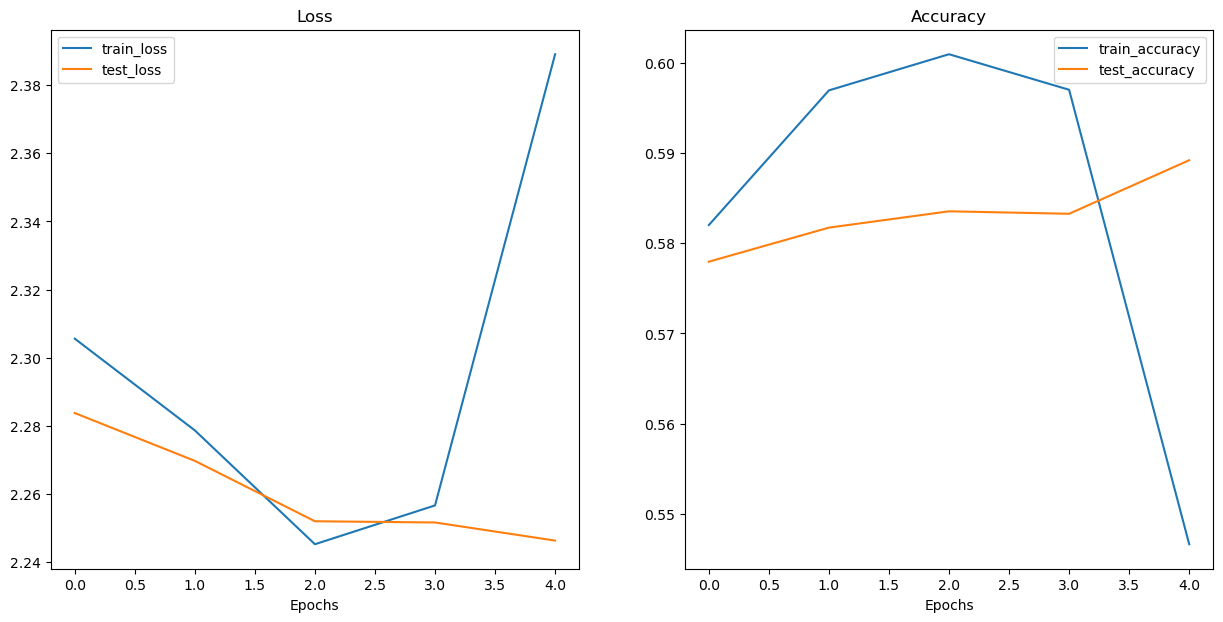

In [133]:
from helper_functions import plot_loss_curves

# Check out the loss curves for FoodVision Big
plot_loss_curves(effnetb2_food101_results)

<div class='alert alert-danger'>

**This is interesting cause the loss curve in faster machine looks great. but in this machine, it doesn't look great.**

***But Why?** We will check this later.*

</div>

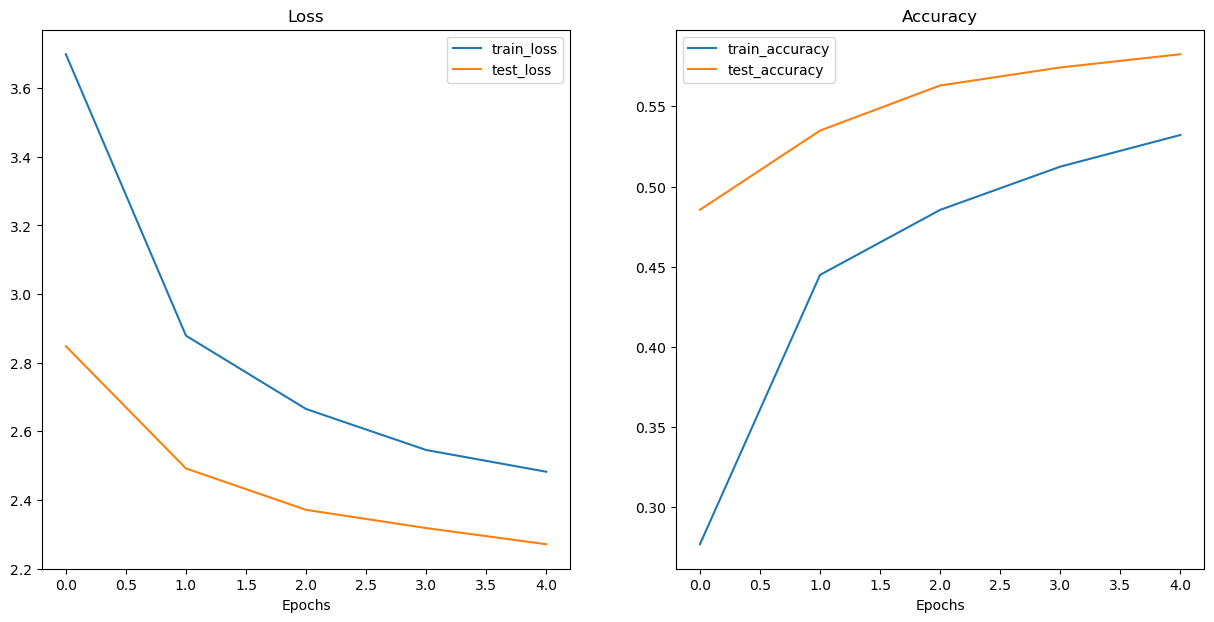

In [135]:
# result from the faster machine

effnetb2_food101_fastermachine_result = {'train_loss': [3.698896775945732,
  2.8788548090451314,
  2.665228535924262,
  2.5457308117372506,
  2.4823931633930787],
 'train_acc': [0.2769291650178076,
  0.44487534626038777,
  0.48542408653211955,
  0.512373037857803,
  0.5321197731170033],
 'test_loss': [2.8481979015444923,
  2.4919842984065537,
  2.371307327727641,
  2.3182434050504828,
  2.2711799854089407],
 'test_acc': [0.4854781582054307,
  0.5348681621408898,
  0.5630066902794176,
  0.5742227469500198,
  0.5824872097599374]}

plot_loss_curves(effnetb2_food101_fastermachine_result)

### Saving and loading FoodVision Big

Now we've trained our biggest model yet, let's save it so we can load it back in later.

In [136]:
from going_modular.going_modular import utils

effnetb2_food101_model_path = "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth" 

# Save FoodVision Big model
utils.save_model(model=effnetb2_food101,
                 target_dir="models",
                 model_name=effnetb2_food101_model_path)

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth


Model saved!

Before we move on, let's make sure we can load it back in.

We'll do so by creating a model instance first with `create_effnetb2_model(num_classes=101)` (101 classes for all Food101 classes).

And then loading the saved `state_dict()` with `torch.nn.Module.load_state_dict()` and `torch.load()`.

In [137]:
# Create Food101 compatible EffNetB2 instance
loaded_effnetb2_food101, effnetb2_transforms = create_effnetb2_model(num_classes=101)

# Load the saved model's state_dict()
loaded_effnetb2_food101.load_state_dict(torch.load("models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"))

<All keys matched successfully>

### 10.8 Checking FoodVision Big model size

Our FoodVision Big model is capable of classifying 101 classes versus FoodVision Mini's 3 classes, a 33.6x increase!

***How does this affect the model size?***

Let's find out.

In [138]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_food101_model_size = Path("models", effnetb2_food101_model_path).stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly) 
print(f"Pretrained EffNetB2 feature extractor Food101 model size: {pretrained_effnetb2_food101_model_size} MB")

Pretrained EffNetB2 feature extractor Food101 model size: 30 MB


Checking with a terminal command

In [141]:
!du -h 'models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth'

 30M	models/09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth


<div class='alert alert-success'>
    
***Hmm, it looks like the `model size stayed largely the same` (30 MB for FoodVision Big and 29 MB for FoodVision Mini) despite the large increase in the number of classes.***

</div>

This is because all the extra parameters for FoodVision Big are only in the last layer (the classifier head).

All of the base layers are the same between FoodVision Big and FoodVision Mini.

*Going back up and comparing the model summaries will give more details*

|Model|	Output shape (num classes)|	Trainable parameters|	Total parameters|	Model size (MB)|
|:-|:-|:-|:-|:-|
|FoodVision Mini (EffNetB2 feature extractor)|3|	4,227|	7,705,221|	29|
|FoodVision Big (EffNetB2 feature extractor)|	101|	142,309|	7,843,303|	30|

## 11. Turning our FoodVision Big model into a deployable app

We've got a trained and saved EffNetB2 model on 20% of the Food101 dataset.

ANd instead of letting our model live in a folder all its life, let's deploy it!

We'll deploy our FoodVision Big model in the same way we deployed our FoodVision Mini model, as a Gradio demo on huggingFace Spaces.

---

To begin, let's create a `demos/foodvision_big/` directory to store our FoodVision Big demo files as well as `demos/foodvision_big/examples/` directory to hold an example image to test the demo with.

When we're finished we'll have the following file structure

```
demos/
    foodvision_big/
        09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth
        app.py
        class_names.txt
        examples/
          example_1.jpg
        model.py
        requirements.txt 
```

Where:
- 09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth is our trained PyTorch model file.
- `app.py` contains our FoodVision Big Gradio app.
- `class_names.txt` contains all of the class names for FoodVision Big.
- `examples/` contains example images to use with our Gradio app.
- `model.py` contains the model definition as well as any transforms associated with the model.
- `requirements.txt` contains the dependencies to run our app such as `torch`, `torchvision`, `gradio`, and `numpy`

In [142]:
from pathlib import Path

# Create FoodVision Big demo path
foodvision_big_demo_path = Path("demos/foodvision_big/")

# Make FoodVision Big demo directory
foodvision_big_demo_path.mkdir(parents=True, exist_ok=True)

# Make FoodVision Big demo examples directory
(foodvision_big_demo_path / "examples").mkdir(parents=True, exist_ok=True)

Putting some data to the `examples/` folder

In [182]:
import random
import shutil
import os

data_dir = Path('data')
list_of_train_images = list(data_dir.glob("*/train/*/*"))

random.seed(42)
random_example_images = random.sample(list_of_train_images, k = 10)

for example_image in random_example_images:
    print('[INFO] copying examples')
    shutil.copy(example_image, f'./demos/foodvision_big/examples/')
    print('[INFO] copied.')

os.listdir('./demos/foodvision_big/examples/')

[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.
[INFO] copying examples
[INFO] copied.


['417368.jpg',
 '2382016.jpg',
 '1752330.jpg',
 '1927984.jpg',
 '214320.jpg',
 '1029698.jpg',
 '3441394.jpg',
 '286219.jpg',
 '2136662.jpg',
 '1264154.jpg']

### 11.2 Saving Food101 class names to a file (`class_names.txt`)

Because there are so many classes in the Food101 dataset, instead of storing them as a `list` ❌ in our app.py file, let's save them to a `.txt` ✅ file and read them in when necessary instead.

We'll just remind ourselves what they look like first by checking out `food101_class_names`.

In [143]:
# Check out the first 10 Food101 class names
food101_class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

Now we can write these to a text file by first creating a path to `demos/foodvision_big/class_names.txt`

And then opening a file with `Python's open()` and then writing to it leaving a new line for each class.

Ideally, we want our class names to be saved like:
```
apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
...
```

In [144]:
# Create path to Food101 class names
foodvision_big_class_names_path = foodvision_big_demo_path / "class_names.txt"

# Write Food101 class names list to file
with open(foodvision_big_class_names_path, "w") as f:
    print(f"[INFO] Saving Food101 class names to {foodvision_big_class_names_path}")
    f.write("\n".join(food101_class_names)) # leave a new line between each class

[INFO] Saving Food101 class names to demos/foodvision_big/class_names.txt


Great, now let's make sure we can read them.

To do so, we'll use Python's `open()` in read mode `r` and then use the `readlineas()` method to read each line of our `class_names.txt` file.

And we can save the class names to a list by stripping the newline value of each of them with alist comprehension and `strip()`.

In [146]:
# open food101 class names file and read each line into a list
with open(foodvision_big_class_names_path, 'r') as f:
    food101_class_names_loaded = [foodname.strip() for foodname in f.readlines()]

# View the first 5 class names loaded back in
food101_class_names_loaded[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

### 11.3 Turning our FoodVision Big model into a Python script (`model.py`)

Just like the FoodVision Mini demo, let's create a script that's capable of instantiating an EffNetB2 feature extractor model along with its necessary transforms.

In [153]:
%%writefile demos/foodvision_big/model.py
import torch
import torchvision

from torch import nn

def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    """Creates an EfficientNetB2 feature extractor model and transforms.

    Args:
        num_classes (int, optional): number of classes in the classifier head. 
            Defaults to 3.
        seed (int, optional): random seed value. Defaults to 42.

    Returns:
        model (torch.nn.Module): EffNetB2 feature extractor model. 
        transforms (torchvision.transforms): EffNetB2 image transforms.
    """

    # Create EffNetB2 pretrained weights, transforms, and model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = torchvision.models.efficientnet_b2(weights=weights)

     # Freeze all layers in base model
    for param in model.parameters():
        param.requires_grad = False

    # Change classifier head with random seed for reproducibility
    torch.manual_seed(42)
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes)
    )

    return model, transforms

Overwriting demos/foodvision_big/model.py


### 11.4 Turning our FoodVision Big Gradio app into a Python script(`app.py`)

We've got a FoodVision Big model.py script, now let's create a FoodVision Big app.py script.

This will again mostly be the same as the FoodVision Mini app.py script except we'll change:

1. **Imports and class names setup** - The `class_names` variable will be a list for all of the Food101 classes rather than pizza, steak, sushi. We can access these via `demos/foodvision_big/class_names.txt`.

2. **Model and transforms preparation** - The model will have `num_classes=101` rather than num_classes=3. We'll also be sure to load the weights from `"09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth"` (our FoodVision Big model path).

3. **Predict function** - This will stay the same as FoodVision Mini's `app.py`.

4. **Gradio app** - The Gradio interface will have different `title`, `description` and `article` parameters to reflect the details of FoodVision Big.

In [161]:
%%writefile demos/foodvision_big/app.py
### 1. Imports and class names setup ### 
import gradio as gr
import os
import torch

from model import create_effnetb2_model
from timeit import default_timer as timer
from typing import Tuple, Dict

# Setup class names
with open("class_names.txt", "r") as f: # reading them in from class_names.txt
    class_names = [food_name.strip() for food_name in  f.readlines()]
    
### 2. Model and transforms preparation ###    

# Create model
effnetb2, effnetb2_transforms = create_effnetb2_model(
    num_classes=101, # could also use len(class_names)
)

# Load saved weights
effnetb2.load_state_dict(
    torch.load(
        f="09_pretrained_effnetb2_feature_extractor_food101_20_percent_fastermachine.pth",
        map_location=torch.device("cpu"),  # load to CPU
    )
)

### 3. Predict function ###

# Create predict function
def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()
    
    # Transform the target image and add a batch dimension
    img = effnetb2_transforms(img).unsqueeze(0)
    
    # Put model into evaluation mode and turn on inference mode
    effnetb2.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(effnetb2(img), dim=1)
    
    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}
    
    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)
    
    # Return the prediction dictionary and prediction time 
    return pred_labels_and_probs, pred_time

### 4. Gradio app ###

# Create title, description and article strings
title = "FoodVision Big 🍔👁"
description = "An EfficientNetB2 feature extractor computer vision model to classify images of food into [101 different classes](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/food101_class_names.txt)."
article = "Created at [09. PyTorch Model Deployment](https://www.learnpytorch.io/09_pytorch_model_deployment/)."

# Create examples list from "examples/" directory
example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create Gradio interface 
demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Label(num_top_classes=5, label="Predictions"),
        gr.Number(label="Prediction time (s)"),
    ],
    examples=example_list,
    title=title,
    description=description,
    article=article,
)

# Launch the app!
demo.launch()

Overwriting demos/foodvision_big/app.py


### 11.5 Creating a requirements file for FoodVision Big (`requirements.txt`)

Now all we need is a `requirements.txt` file to tell our Hugging Face Space what dependencies our FoodVision Big app requires.`

In [160]:
%%writefile demos/foodvision_big/requirements.txt
torch==2.2.2
torchvision==0.17.2
gradio==4.44.0
numpy==1.26.4

Overwriting demos/foodvision_big/requirements.txt


In [159]:
import gradio

gradio.__version__

'4.44.0'

### 11.7 Deploying our FoodVision Big app to HuggingFace Spaces

TIme to bring our biggest model of the whole course to life!

Let's deploy our FoodVision Big Gradio demo to Hugging Face Spaces so we can test it interactively and let others experience the magic of our machine learning efforts!

***Note:** There are [several ways to upload files to Hugging Face Spaces](https://huggingface.co/docs/hub/repositories-getting-started#getting-started-with-repositories). The following steps treat Hugging Face as a git repository to track files. However, you can also upload directory to HuggingFace Spaces via the [web interface](https://huggingface.co/docs/hub/repositories-getting-started#adding-files-to-a-repository-web-ui) or by the [`huggingface_hug` library](https://huggingface.co/docs/huggingface_hub/index).

The good news is, we've already done the steps to do so with FoodVision Mini, so now all we have to do is cutomize them to suit FoodVision Big:
1. Sign up for a Hugging Face account.
2. Start a new Hugging Face Space by going to your profile and then [clicking "New Space"](https://huggingface.co/new-space).
- ***Note**: A Space in Hugging Face is also known as a "code repository" (a place to store your code/files) or "repo" for short.*
3. Give the Space a name, for example, mine is called `mahesh-hug-fac/foodvision_big`, you can see it here: `https://huggingface.co/spaces/mahesh-hug-fac/foodvision_big`
4. Select a license (I used MIT).
5. Select Gradio as the Space SDK (software development kit).
  - ***Note**: You can use other options such as Streamlit but since our app is built with Gradio, we'll stick with that.*
6. Choose whether your space is public or private (I selected public since I'd like my Space to be available to others).
7. Click `Create Space`.
8. Clone the repo locally by running: `git clone` `https://huggingface.co/spaces/[YOUR_USERNAME]/[YOUR_SPACE_NAME]` in terminal or command prompt.
    - **Note**: Your can also add files via uploading them under the `Files and Versions` tab.
9. Copy/move the contents of the downloaded `foodvision_big` folder to the cloned repo folder.
10. To upload and track larger files (e.g. files over 10MB or in our case, our PyTorch model file) you'll need to `install Git LFS` (which stands for "git large file storage").
11. After you've install Git LFS, you can activate it by running `git lfs install`.
12. In the `foodvisoin_big` directory, track the files over 10MB with Git LFS with `git lfs track "*.file_extension"`
    - Track EffNetB2 PyTorch model file with git lfs track "09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth".
    - ***Note**: If you get any errors uploading images, you may have to track them with git lfs too, for example git lfs track "examples/04-pizza-dad.jpg"*
13. Track `.gitattributes` (automatically created when cloning from HuggingFace, this file will help ensure our larger files are tracked with Git LFS).
    - `git add .gitattributes`
14. Add the rest of the foodvision_big app files and commit them with:
    - `git add *`
    - `git commit -m "first commit"`
15. Push (upload) the files to Hugging Face:
    - `git push`
 
If everything worked correctly, our FoodVision Big Gradio demo should be ready to classify!

In [151]:
# IPython is a library to help work with Python interactively
from IPython.display import IFrame

# Embed FoodVision Big Gradio demo as an iFrame
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_big/+", width=900, height=750)


How cool is that!?!

We've come a long way from building PyTorch models to predict a straight line... now we're building computer vision models accessible to people all around the world!

In [168]:
data_dir = Path('data')
list(data_dir.glob("*/train/*/*"))[10]

PosixPath('data/pizza_steak_sushi_20_percent/train/steak/167069.jpg')